# EDA

## 유기견 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# prompt: 시각화에 필요한 라이브러리 불러오고 오류메세지 무시해줘
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as spst
plt.rc('font', family='NanumBarunGothic')

In [ ]:
# prompt: 구글 드라이브에 있는 csv 파일 읽어오는 코드

import pandas as pd

# Replace 'your_file_path.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/빅프로젝트/경기도_유기동물보호현황.csv'

try:
  df = pd.read_csv(file_path, encoding='cp949')
  print(df.head()) # Print the first few rows of the DataFrame
except FileNotFoundError:
  print(f"Error: File not found at {file_path}")
except pd.errors.EmptyDataError:
  print(f"Error: The file at {file_path} is empty.")
except pd.errors.ParserError:
  print(f"Error: Could not parse the file at {file_path}. Check the file format.")
except Exception as e:
  print(f"An unexpected error occurred: {e}")

    시군명      접수일자                   발견장소   상태             공고고유번호    공고시작일자  \
0   부천시  20250105                소사로 284  보호중   경기-부천-2025-00006  20250105   
1  남양주시  20250104     남양주시 조안면 도곡리 산138   보호중  경기-남양주-2025-00011  20250104   
2   성남시  20250104                창곡동 509  보호중   경기-성남-2025-00003  20250104   
3   양평군  20250104  경기도 양평군 양평읍 원덕리 342번지  보호중   경기-양평-2025-00003  20250104   
4  남양주시  20250104     남양주시 조안면 도곡리 산138   보호중  경기-남양주-2025-00014  20250104   

     공고종료일자       품종        색상        나이  ...       보호소전화번호  \
0  20250115  [개] 말티즈        흰색  2024(년생)  ...  032-677-5262   
1  20250114  [개] 믹스견        흰색  2023(년생)  ...  031-579-3604   
2  20250114   [개] 푸들        갈색  2023(년생)  ...  031-714-8392   
3  20250114  [개] 믹스견  갈색&검정&흰색  2018(년생)  ...  031-770-2337   
4  20250114  [개] 믹스견        흰색  2023(년생)  ...  031-579-3604   

                   보호소도로명주소                              보호소지번주소 보호소우편번호  \
0       경기도 부천시 오정구 소사로 779  경기도 부천시 오정구 원종동 229-8번지 뉴월드프라자 201호   14427   


In [ ]:
df.columns

Index(['시군명', '접수일자', '발견장소', '상태', '공고고유번호', '공고시작일자', '공고종료일자', '품종', '색상',
       '나이', '체중', '성별', '중성화여부', '특징', '보호소명', '보호소전화번호', '보호소도로명주소',
       '보호소지번주소', '보호소우편번호', '관할기관', '특이사항', '이미지경로', '썸네일이미지경로', 'WGS84위도',
       'WGS84경도'],
      dtype='object')

In [ ]:
df_copy = df[['시군명', '접수일자', '발견장소', '상태', '공고시작일자', '공고종료일자', '품종', '색상',
       '나이', '체중', '성별', '중성화여부', '보호소명','보호소지번주소']]

In [ ]:
df_copy

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,보호소명,보호소지번주소
0,부천시,20250105,소사로 284,보호중,20250105,20250115,[개] 말티즈,흰색,2024(년생),5.0(Kg),M,N,24시아이동물메디컬,경기도 부천시 오정구 원종동 229-8번지 뉴월드프라자 201호
1,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,[개] 믹스견,흰색,2023(년생),12(Kg),F,N,남양주시동물보호센터,경기도 남양주시 이패동 484번지
2,성남시,20250104,창곡동 509,보호중,20250104,20250114,[개] 푸들,갈색,2023(년생),6(Kg),M,N,펫앤쉘터동물병원,경기도 성남시 분당구 수내동 87-1번지 유신제일조합
3,양평군,20250104,경기도 양평군 양평읍 원덕리 342번지,보호중,20250104,20250114,[개] 믹스견,갈색&검정&흰색,2018(년생),12(Kg),F,N,양평군유기동물보호소,경기도 양평군 양평읍 공흥리 1-1번지
4,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,[개] 믹스견,흰색,2023(년생),13(Kg),M,N,남양주시동물보호센터,경기도 남양주시 이패동 484번지
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10063,화성시,20240709,화성로 인근,종료(자연사),20240709,20240718,[고양이] 한국 고양이,검정흰색,2024(60일미만)(년생),0.8(Kg),Q,N,남양동물보호센터,경기도 화성시 남양읍 북양리 12-2번지
10064,화성시,20240709,봉담 119,종료(기증),20240709,20240718,[개] 브리타니 스파니엘,흰색갈색,2022(년생),7(Kg),M,N,남양동물보호센터,경기도 화성시 남양읍 북양리 12-2번지
10065,화성시,20240709,송산 사강시장길 인근,종료(자연사),20240709,20240718,[고양이] 한국 고양이,주황검정갈색,2024(60일미만)(년생),0.8(Kg),Q,N,남양동물보호센터,경기도 화성시 남양읍 북양리 12-2번지
10066,화성시,20240709,효행로 인근,종료(자연사),20240709,20240718,[고양이] 한국 고양이,흰색노랑,2024(60일미만)(년생),0.5(Kg),Q,N,남양동물보호센터,경기도 화성시 남양읍 북양리 12-2번지


In [ ]:
import re

def extract_eupmyeondong(address):
  match = re.search(r"(.+?[읍면동])", address)
  if match:
    return match.group(1)
  else:
    return None

df_copy['읍면동명'] = df_copy['보호소지번주소'].apply(extract_eupmyeondong)

In [ ]:
def extract_eupmyeondong(address):
  if pd.isna(address):
    return None
  match = re.search(r"([가-힣]+[읍면동])", address)
  if match:
    return match.group(1)
  else:
    return None

df_copy['읍면동명'] = df_copy['보호소지번주소'].apply(extract_eupmyeondong)

In [ ]:
df_copy.tail(2)

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,보호소명,보호소지번주소,읍면동명
10066,화성시,20240709,효행로 인근,종료(자연사),20240709,20240718,[고양이] 한국 고양이,흰색노랑,2024(60일미만)(년생),0.5(Kg),Q,N,남양동물보호센터,경기도 화성시 남양읍 북양리 12-2번지,남양읍
10067,화성시,20240709,기안동 인근,종료(방사),20240708,20240708,[고양이] 한국 고양이,검정회색흰색,2022(년생),3(Kg),Q,N,남양동물보호센터,경기도 화성시 남양읍 북양리 12-2번지,남양읍


In [ ]:
df_copy.drop('보호소지번주소', axis=1, inplace=True)

In [ ]:
df_copy.tail(2)

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,보호소명,읍면동명
10066,화성시,20240709,효행로 인근,종료(자연사),20240709,20240718,[고양이] 한국 고양이,흰색노랑,2024(60일미만)(년생),0.5(Kg),Q,N,남양동물보호센터,남양읍
10067,화성시,20240709,기안동 인근,종료(방사),20240708,20240708,[고양이] 한국 고양이,검정회색흰색,2022(년생),3(Kg),Q,N,남양동물보호센터,남양읍


In [ ]:
df_dog = df_copy[df_copy['품종'].str.contains('개', na=False)]
df_dog.tail(2)

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,보호소명,읍면동명
10060,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,[개] 믹스견,갈색,2024(60일미만)(년생),0.60(Kg),F,N,오산 유기동물보호소,오산동
10064,화성시,20240709,봉담 119,종료(기증),20240709,20240718,[개] 브리타니 스파니엘,흰색갈색,2022(년생),7(Kg),M,N,남양동물보호센터,남양읍


In [ ]:
df_dog['나이'].value_counts()

,count
나이,
2024(60일미만)(년생),1620
2024(년생),1399
2022(년생),948
2021(년생),938
2023(년생),574
2020(년생),551
2019(년생),399
2018(년생),223
2017(년생),192


In [ ]:
df_dog['나이'] = df_dog['나이'].astype(str).str[:4]

In [ ]:
df_dog['나이'].value_counts()

,count
나이,
2024,3019
2022,948
2021,938
2023,574
2020,551
2019,399
2018,223
2017,192
2014,153


In [ ]:
df_dog = df_dog[~df_dog['나이'].str.contains('\(년생\)', na=False)]

df_dog['나이'].value_counts()

,count
나이,
2024,3019
2022,948
2021,938
2023,574
2020,551
2019,399
2018,223
2017,192
2016,153


In [ ]:
df_dog.tail()

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,보호소명,읍면동명
10057,시흥시,20240709,정왕동 2003-16,보호중,20240709,20240719,[개] 말티즈,흰색,2017,3.4(Kg),M,Y,시흥동물누리보호센터,정왕동
10058,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,[개] 믹스견,갈색,2024,0.70(Kg),M,N,오산 유기동물보호소,오산동
10059,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,[개] 믹스견,갈색,2024,0.60(Kg),F,N,오산 유기동물보호소,오산동
10060,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,[개] 믹스견,갈색,2024,0.60(Kg),F,N,오산 유기동물보호소,오산동
10064,화성시,20240709,봉담 119,종료(기증),20240709,20240718,[개] 브리타니 스파니엘,흰색갈색,2022,7(Kg),M,N,남양동물보호센터,남양읍


In [ ]:
df_dog.reset_index(drop=True, inplace=True)

In [ ]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7396 entries, 0 to 7395
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군명     7396 non-null   object
 1   접수일자    7396 non-null   int64 
 2   발견장소    7396 non-null   object
 3   상태      7396 non-null   object
 4   공고시작일자  7396 non-null   int64 
 5   공고종료일자  7396 non-null   int64 
 6   품종      7396 non-null   object
 7   색상      7396 non-null   object
 8   나이      7396 non-null   object
 9   체중      7396 non-null   object
 10  성별      7396 non-null   object
 11  중성화여부   7396 non-null   object
 12  보호소명    7396 non-null   object
 13  읍면동명    7396 non-null   object
dtypes: int64(3), object(11)
memory usage: 809.1+ KB


In [ ]:
df_dog

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중,성별,중성화여부,보호소명,읍면동명
0,부천시,20250105,소사로 284,보호중,20250105,20250115,[개] 말티즈,흰색,2024,5.0(Kg),M,N,24시아이동물메디컬,원종동
1,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,[개] 믹스견,흰색,2023,12(Kg),F,N,남양주시동물보호센터,이패동
2,성남시,20250104,창곡동 509,보호중,20250104,20250114,[개] 푸들,갈색,2023,6(Kg),M,N,펫앤쉘터동물병원,수내동
3,양평군,20250104,경기도 양평군 양평읍 원덕리 342번지,보호중,20250104,20250114,[개] 믹스견,갈색&검정&흰색,2018,12(Kg),F,N,양평군유기동물보호소,양평읍
4,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,[개] 믹스견,흰색,2023,13(Kg),M,N,남양주시동물보호센터,이패동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391,시흥시,20240709,정왕동 2003-16,보호중,20240709,20240719,[개] 말티즈,흰색,2017,3.4(Kg),M,Y,시흥동물누리보호센터,정왕동
7392,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,[개] 믹스견,갈색,2024,0.70(Kg),M,N,오산 유기동물보호소,오산동
7393,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,[개] 믹스견,갈색,2024,0.60(Kg),F,N,오산 유기동물보호소,오산동
7394,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,[개] 믹스견,갈색,2024,0.60(Kg),F,N,오산 유기동물보호소,오산동


In [ ]:
# Rename the '체중' column to '체중(KG)'
df_dog = df_dog.rename(columns={'체중': '체중(KG)'})

# Remove '(Kg)' from the '체중(KG)' column
df_dog['체중(KG)'] = df_dog['체중(KG)'].astype(str).str.replace(r'\(Kg\)', '', regex=True)

df_dog.head()

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중(KG),성별,중성화여부,보호소명,읍면동명
0,부천시,20250105,소사로 284,보호중,20250105,20250115,[개] 말티즈,흰색,2024,5.0,M,N,24시아이동물메디컬,원종동
1,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,[개] 믹스견,흰색,2023,12,F,N,남양주시동물보호센터,이패동
2,성남시,20250104,창곡동 509,보호중,20250104,20250114,[개] 푸들,갈색,2023,6,M,N,펫앤쉘터동물병원,수내동
3,양평군,20250104,경기도 양평군 양평읍 원덕리 342번지,보호중,20250104,20250114,[개] 믹스견,갈색&검정&흰색,2018,12,F,N,양평군유기동물보호소,양평읍
4,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,[개] 믹스견,흰색,2023,13,M,N,남양주시동물보호센터,이패동


In [ ]:
# Remove "[개]" from the '품종' column
df_dog['품종'] = df_dog['품종'].str.replace(r'\[개\]', '', regex=True)

# Remove whitespace from the '품종' column
df_dog['품종'] = df_dog['품종'].str.strip()

In [ ]:
df_dog.head(2)

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중(KG),성별,중성화여부,보호소명,읍면동명
0,부천시,20250105,소사로 284,보호중,20250105,20250115,말티즈,흰색,2024,5.0,M,N,24시아이동물메디컬,원종동
1,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,믹스견,흰색,2023,12,F,N,남양주시동물보호센터,이패동


In [ ]:
# Convert the '체중(KG)' column to numeric, coercing errors to NaN
df_dog['체중(KG)'] = pd.to_numeric(df_dog['체중(KG)'], errors='coerce')

# Convert the '체중(KG)' column to float
df_dog['체중(KG)'] = df_dog['체중(KG)'].astype(float)

df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7396 entries, 0 to 7395
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군명     7396 non-null   object 
 1   접수일자    7396 non-null   int64  
 2   발견장소    7396 non-null   object 
 3   상태      7396 non-null   object 
 4   공고시작일자  7396 non-null   int64  
 5   공고종료일자  7396 non-null   int64  
 6   품종      7396 non-null   object 
 7   색상      7396 non-null   object 
 8   나이      7396 non-null   object 
 9   체중(KG)  7370 non-null   float64
 10  성별      7396 non-null   object 
 11  중성화여부   7396 non-null   object 
 12  보호소명    7396 non-null   object 
 13  읍면동명    7396 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory usage: 809.1+ KB


In [ ]:
df_dog['상태'].value_counts()

,count
상태,
종료(안락사),1756
보호중,1624
종료(반환),1295
종료(입양),1205
종료(자연사),1052
종료(기증),464


In [ ]:
# Create the '사망여부' column based on the '상태' column
df_dog['사망여부'] = df_dog['상태'].apply(lambda x: 1 if '종료(안락사)' in str(x) or '종료(자연사)' in str(x) else 0)
df_dog['사망여부'].value_counts()

,count
사망여부,
0,4588
1,2808


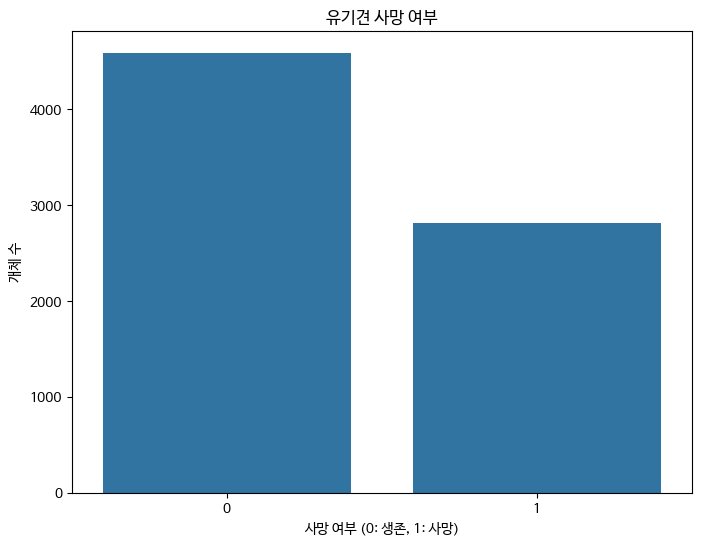

In [ ]:
# 사망여부 시각화
plt.figure(figsize=(8, 6))
sns.countplot(x='사망여부', data=df_dog)
plt.title('유기견 사망 여부')
plt.xlabel('사망 여부 (0: 생존, 1: 사망)')
plt.ylabel('개체 수')
plt.show()

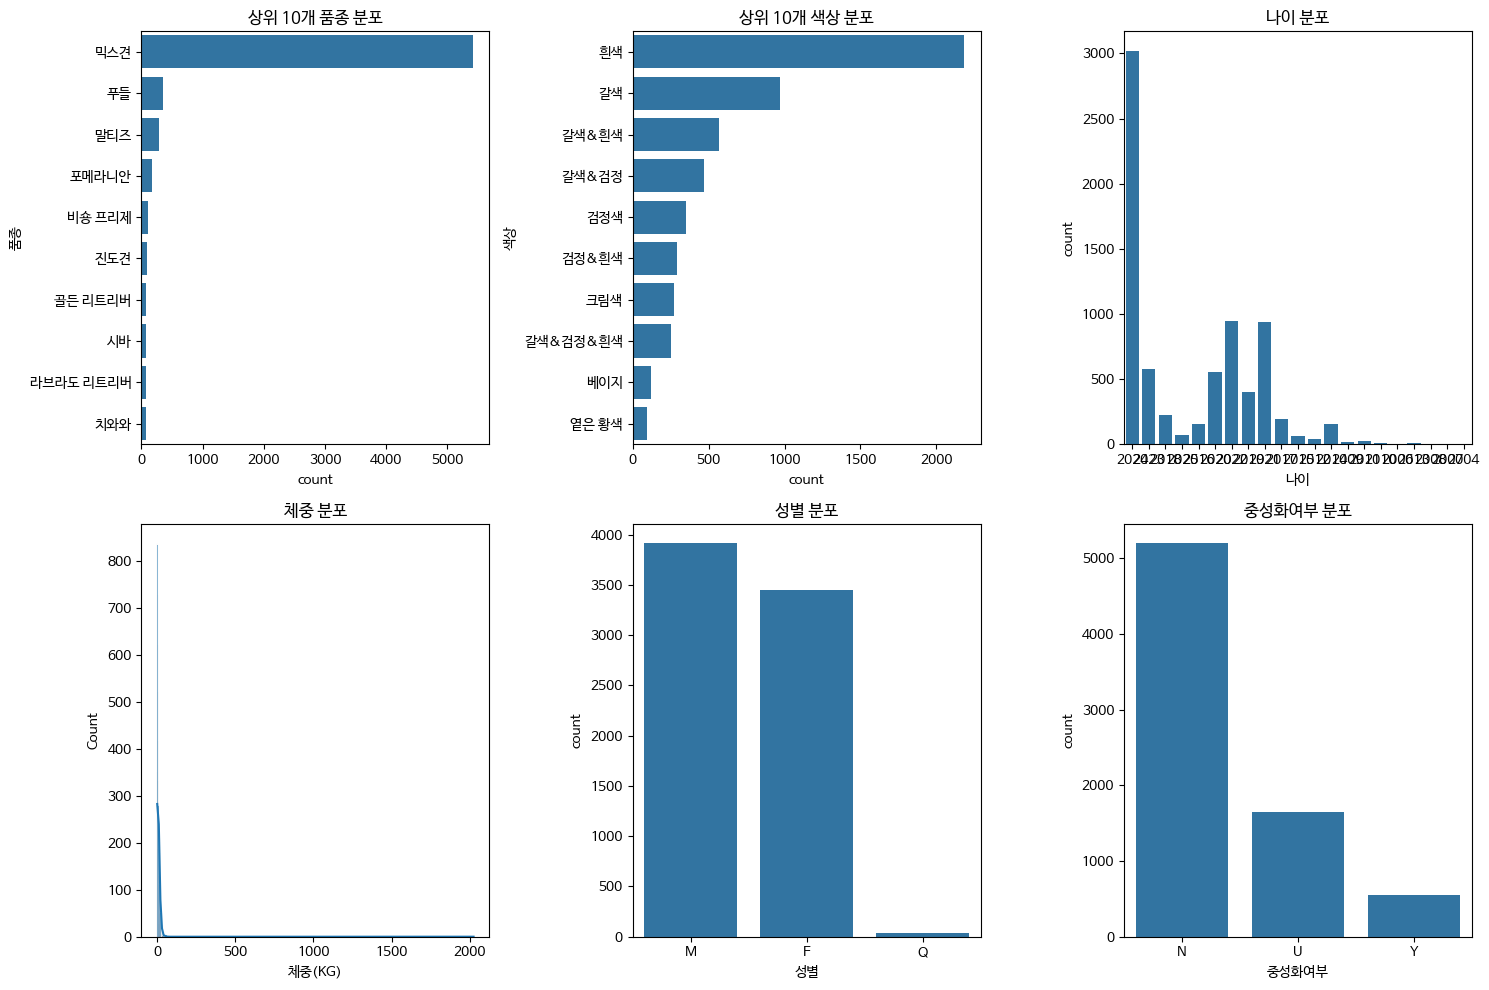

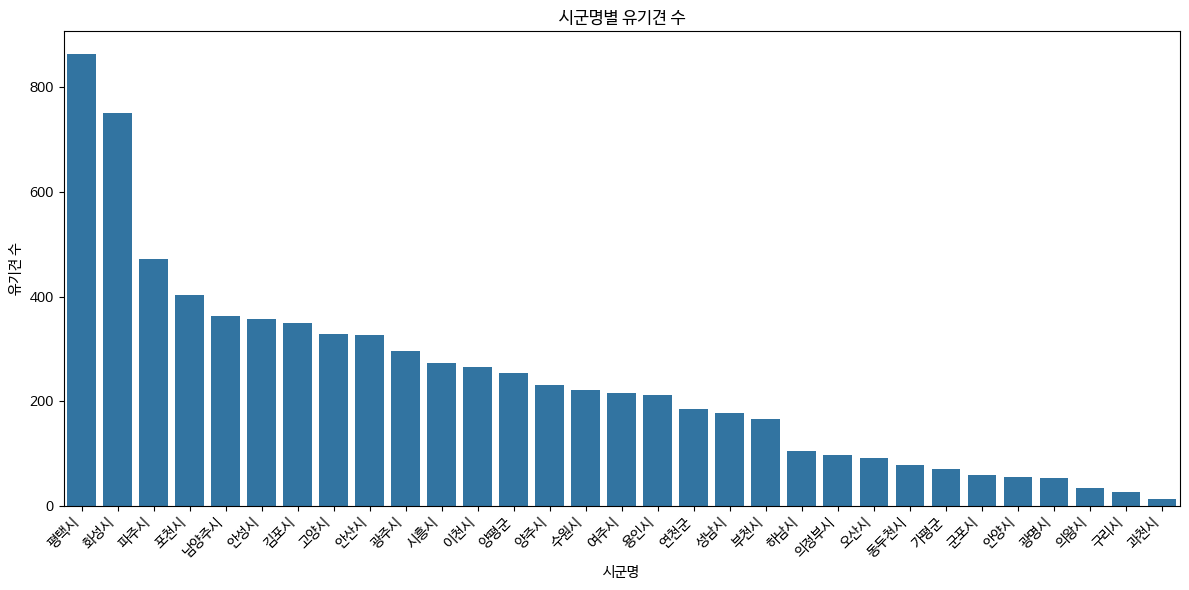

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 품종, 색상, 나이, 체중(KG), 성별, 중성화여부 시각화
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
sns.countplot(y='품종', data=df_dog, order=df_dog['품종'].value_counts().index[:10])  # 상위 10개 품종만 표시
plt.title('상위 10개 품종 분포')

plt.subplot(2, 3, 2)
sns.countplot(y='색상', data=df_dog, order=df_dog['색상'].value_counts().index[:10])  # 상위 10개 색상만 표시
plt.title('상위 10개 색상 분포')

plt.subplot(2, 3, 3)
sns.countplot(x='나이', data=df_dog)
plt.title('나이 분포')

plt.subplot(2, 3, 4)
sns.histplot(df_dog['체중(KG)'], kde=True) # 체중을 숫자형으로 변환 후 히스토그램
plt.title('체중 분포')

plt.subplot(2, 3, 5)
sns.countplot(x='성별', data=df_dog)
plt.title('성별 분포')

plt.subplot(2, 3, 6)
sns.countplot(x='중성화여부', data=df_dog)
plt.title('중성화여부 분포')

plt.tight_layout()
plt.show()


# 시군명별 유기견 수 카운트 및 시각화
city_counts = df_dog['시군명'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=city_counts.index, y=city_counts.values)
plt.xticks(rotation=45, ha='right')  # x축 레이블 회전
plt.title('시군명별 유기견 수')
plt.xlabel('시군명')
plt.ylabel('유기견 수')
plt.tight_layout()
plt.show()

In [ ]:
df_dog

,시군명,접수일자,발견장소,상태,공고시작일자,공고종료일자,품종,색상,나이,체중(KG),성별,중성화여부,보호소명,읍면동명,사망여부
0,부천시,20250105,소사로 284,보호중,20250105,20250115,말티즈,흰색,2024,5.0,M,N,24시아이동물메디컬,원종동,0
1,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,믹스견,흰색,2023,12.0,F,N,남양주시동물보호센터,이패동,0
2,성남시,20250104,창곡동 509,보호중,20250104,20250114,푸들,갈색,2023,6.0,M,N,펫앤쉘터동물병원,수내동,0
3,양평군,20250104,경기도 양평군 양평읍 원덕리 342번지,보호중,20250104,20250114,믹스견,갈색&검정&흰색,2018,12.0,F,N,양평군유기동물보호소,양평읍,0
4,남양주시,20250104,남양주시 조안면 도곡리 산138,보호중,20250104,20250114,믹스견,흰색,2023,13.0,M,N,남양주시동물보호센터,이패동,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7391,시흥시,20240709,정왕동 2003-16,보호중,20240709,20240719,말티즈,흰색,2017,3.4,M,Y,시흥동물누리보호센터,정왕동,0
7392,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,믹스견,갈색,2024,0.7,M,N,오산 유기동물보호소,오산동,1
7393,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,믹스견,갈색,2024,0.6,F,N,오산 유기동물보호소,오산동,1
7394,오산시,20240709,성호대로141,종료(안락사),20240709,20240719,믹스견,갈색,2024,0.6,F,N,오산 유기동물보호소,오산동,1


In [ ]:
df_dog.to_csv('abandoned_dog.csv', index=False, encoding='utf-8-sig')

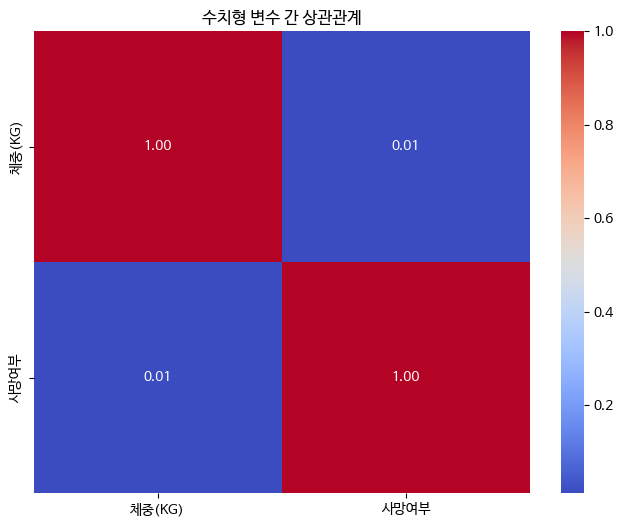

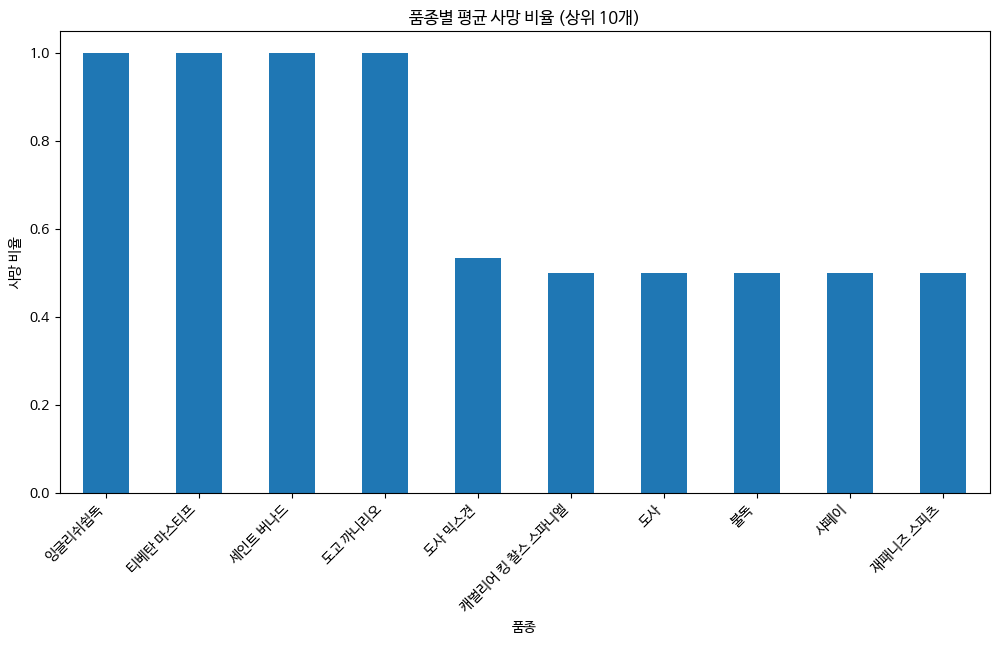

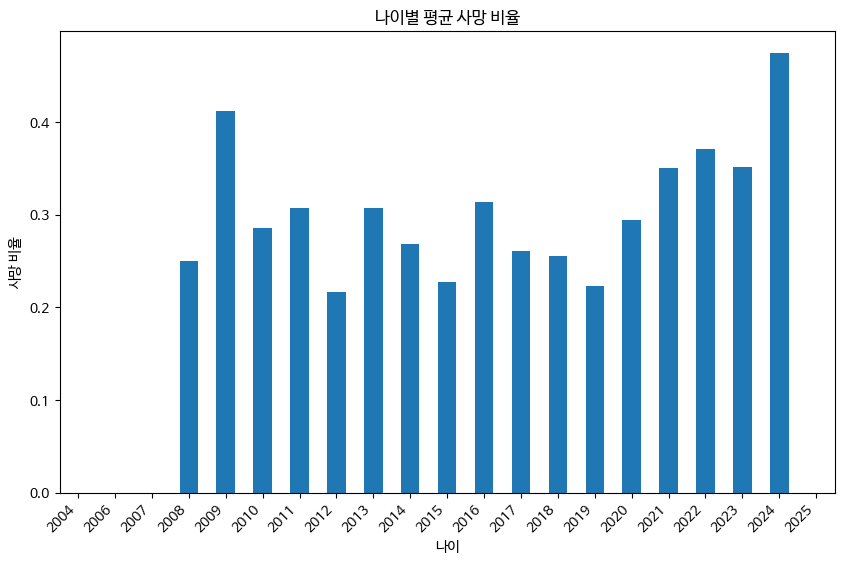

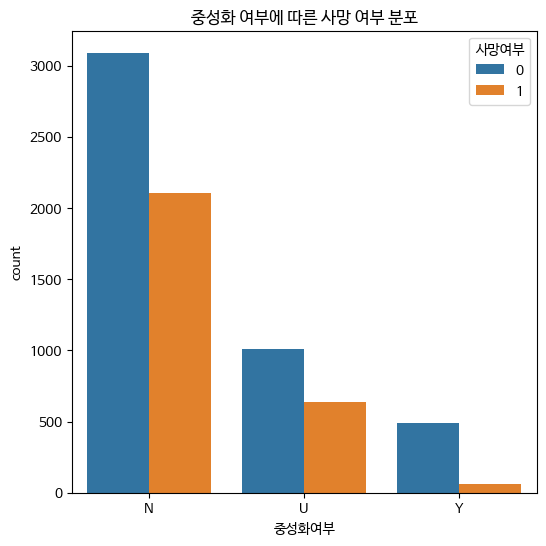

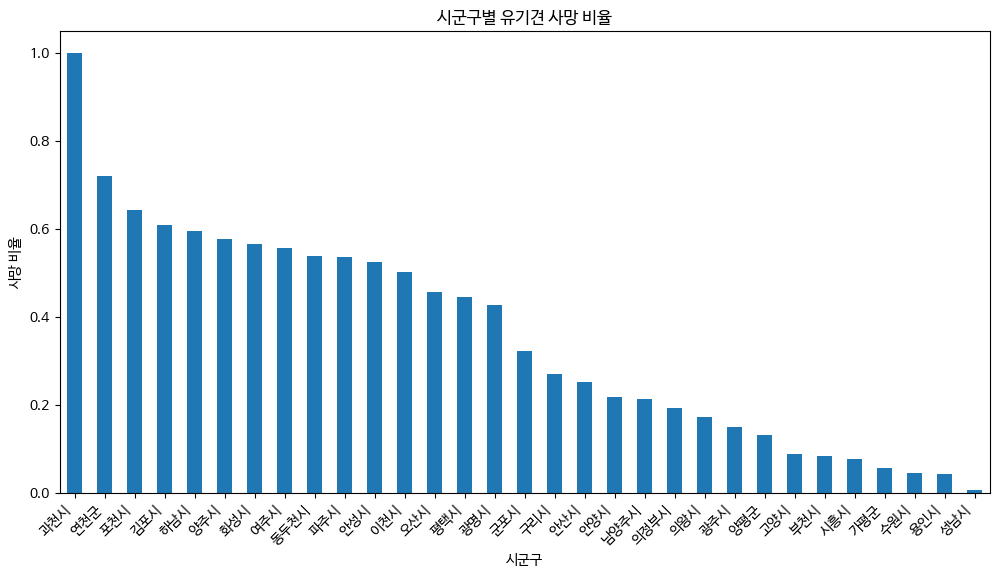

In [ ]:
# 상관관계 분석 및 히트맵 시각화 (수치형 데이터)
numeric_cols = ['체중(KG)', '사망여부']
corr_matrix = df_dog[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('수치형 변수 간 상관관계')
plt.show()

# 품종별 사망 비율 시각화
plt.figure(figsize=(12, 6))
df_dog.groupby('품종')['사망여부'].mean().sort_values(ascending=False).head(10).plot(kind='bar') # 상위 10개 품종
plt.title('품종별 평균 사망 비율 (상위 10개)')
plt.xlabel('품종')
plt.ylabel('사망 비율')
plt.xticks(rotation=45, ha='right')
plt.show()


# 나이별 사망 비율 시각화
plt.figure(figsize=(10, 6))
df_dog.groupby('나이')['사망여부'].mean().plot(kind='bar')
plt.title('나이별 평균 사망 비율')
plt.xlabel('나이')
plt.ylabel('사망 비율')
plt.xticks(rotation=45, ha='right')
plt.show()


# 중성화 여부에 따른 사망 비율 시각화
plt.figure(figsize=(6, 6))
sns.countplot(x='중성화여부', hue='사망여부', data=df_dog)
plt.title('중성화 여부에 따른 사망 여부 분포')
plt.show()

# 시군구별 유기견 사망 비율 시각화
plt.figure(figsize=(12, 6))
df_dog.groupby('시군명')['사망여부'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('시군구별 유기견 사망 비율')
plt.xlabel('시군구')
plt.ylabel('사망 비율')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df_dog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7396 entries, 0 to 7395
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   시군명     7396 non-null   object 
 1   접수일자    7396 non-null   int64  
 2   발견장소    7396 non-null   object 
 3   상태      7396 non-null   object 
 4   공고시작일자  7396 non-null   int64  
 5   공고종료일자  7396 non-null   int64  
 6   품종      7396 non-null   object 
 7   색상      7396 non-null   object 
 8   나이      7396 non-null   object 
 9   체중(KG)  7370 non-null   float64
 10  성별      7396 non-null   object 
 11  중성화여부   7396 non-null   object 
 12  보호소명    7396 non-null   object 
 13  읍면동명    7396 non-null   object 
 14  사망여부    7396 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 866.8+ KB


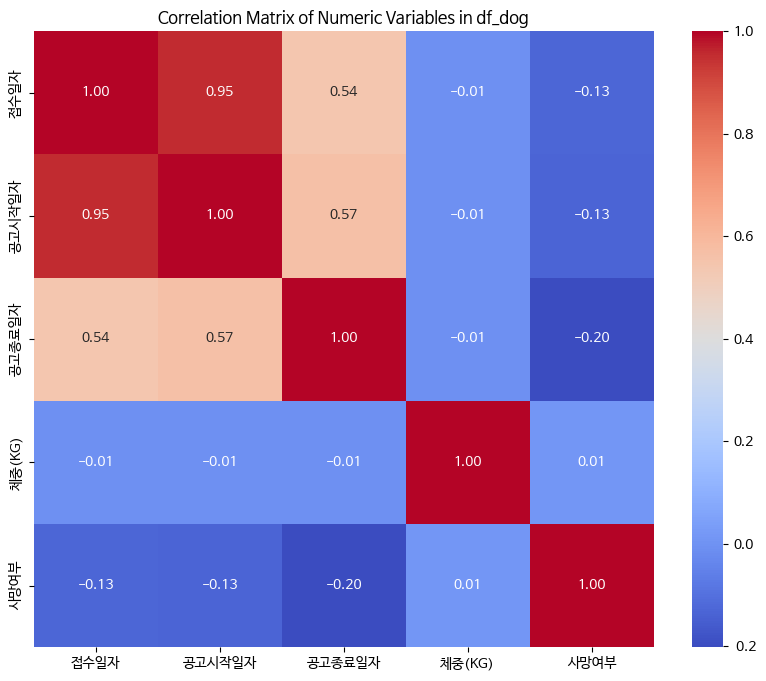

In [ ]:
# Identify all numeric columns in df_dog
numeric_cols = df_dog.select_dtypes(include=['number']).columns

# Create the correlation matrix
corr_matrix = df_dog[numeric_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Variables in df_dog')
plt.show()

1. 과천, 연천, 포천 등 외진 지역에서 나온 유기견들은 사망할 확률이 높음
2. 잉글리시쉼독, 티베탄 마스티프 등 특이종 유기견들은 거의 사망함

## 등록대행업체소 EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import koreanize_matplotlib        # 한글 표시 가능


warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

In [ ]:
hospital = pd.read_csv('/content/drive/MyDrive/시각화_데이터/경기도_동물병원현황.csv', encoding='cp949')

In [ ]:
hospital2 = hospital.loc[hospital['영업상태명'] == '정상'].drop_duplicates()

In [ ]:
hos = hospital2.groupby(by=['시군명'], as_index=False)[['사업장명']].count()

In [ ]:
hos_sort = hos.sort_values(by='사업장명', ascending=False).reset_index(drop=True)

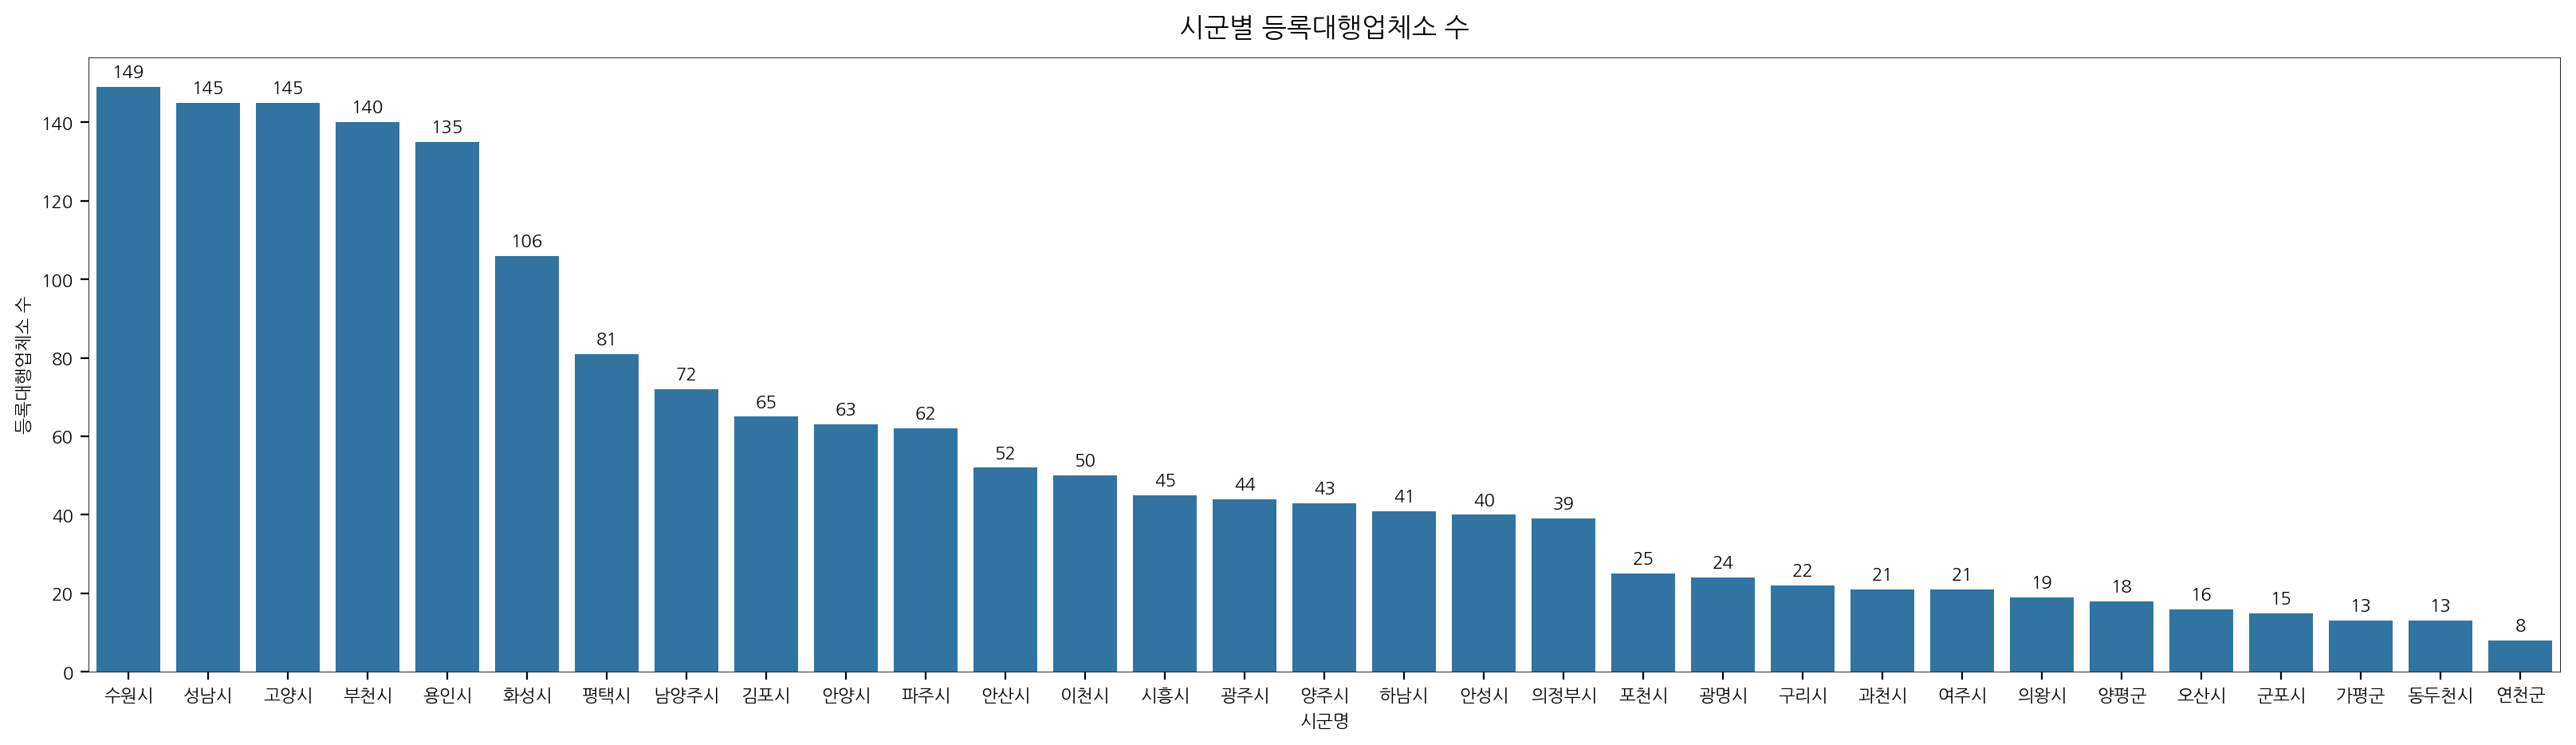

In [ ]:
# 바플롯 그리기
plt.figure(figsize=(20, 5))
plt.rc('font', size = 8)
plt.rc('axes', linewidth = 0.3)

ax = sns.barplot(x = '시군명', y = '사업장명', data = hos_sort)
for container in ax.containers:
    ax.bar_label(container, fontsize=8, label_type='edge', padding = 3)

plt.xlabel('시군명')
plt.ylabel('등록대행업체소 수')
plt.title('시군별 등록대행업체소 수',  size = 12, pad = 10)

plt.show()



*   수원, 성남, 고양, 부천, 용인에 등록대행업체가 많다. (100개 이상)


In [ ]:
dog = pd.read_csv('/content/drive/MyDrive/시각화_데이터/abandoned_dog.csv', encoding='utf-8-sig')

In [ ]:
dog2 = dog.groupby(by=['시군명'], as_index=False)[['접수일자']].count()

In [ ]:
dog_sort = dog2.sort_values(by='접수일자', ascending=False).reset_index(drop=True)

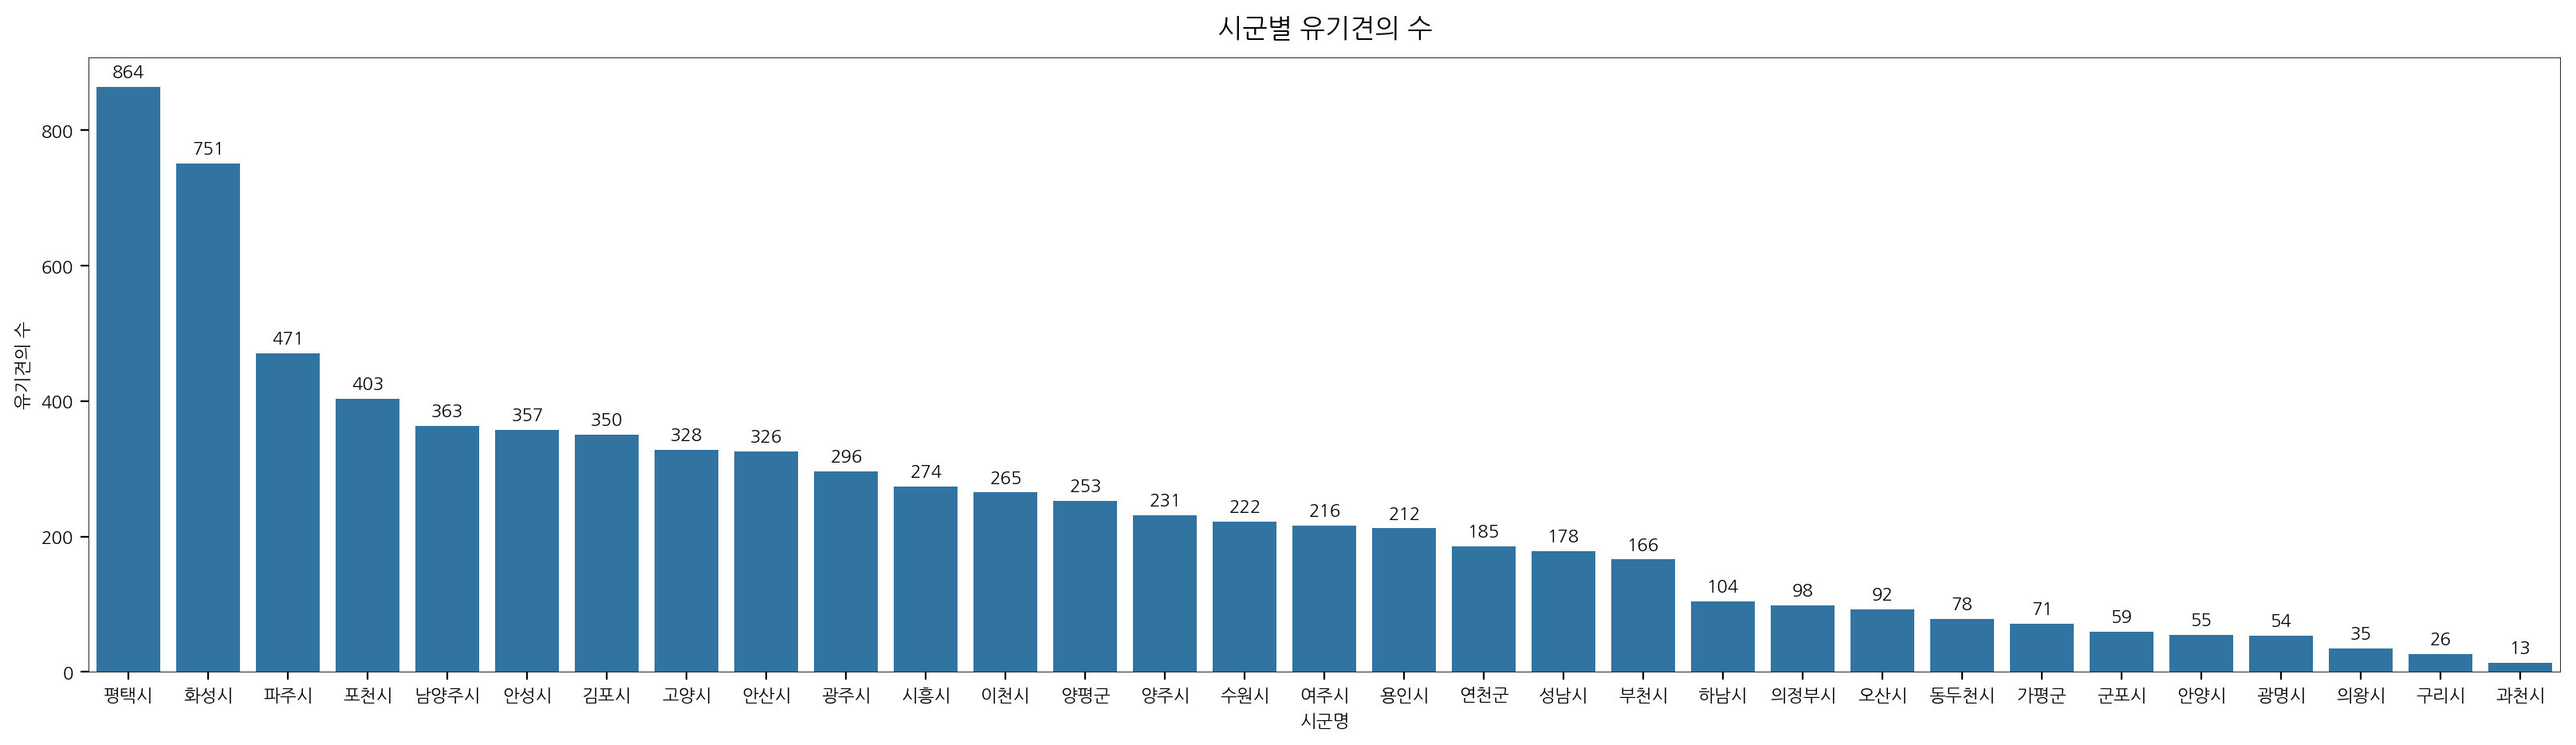

In [ ]:
# 바플롯 그리기
plt.figure(figsize=(20, 5))
plt.rc('font', size = 8)
plt.rc('axes', linewidth = 0.3)

ax = sns.barplot(x = '시군명', y = '접수일자', data = dog_sort)
for container in ax.containers:
    ax.bar_label(container, fontsize=8, label_type='edge', padding = 3)

plt.xlabel('시군명')
plt.ylabel('유기견의 수')
plt.title('시군별 유기견의 수',  size = 12, pad = 10)

plt.show()



*   평택, 화성, 파주, 포천 등에 유기견이 많이 발생한다.



## 인구수 EDA

In [ ]:
population = pd.read_csv('/content/drive/MyDrive/시각화_데이터/시군별_인구수.csv', encoding='cp949')

In [ ]:
population2 = pd.merge(dog2, population, how='left', left_on='시군명', right_on='행정구역')

In [ ]:
population3 = population2[['시군명', '2024년12월_총인구수']]

In [ ]:
# 쉼표 제거 후 float 형으로 변환
population3['2024년12월_총인구수'] = population3['2024년12월_총인구수'].str.replace(',', '').astype(int)

In [ ]:
population4 = population3.sort_values(by='2024년12월_총인구수', ascending=False).reset_index(drop=True)

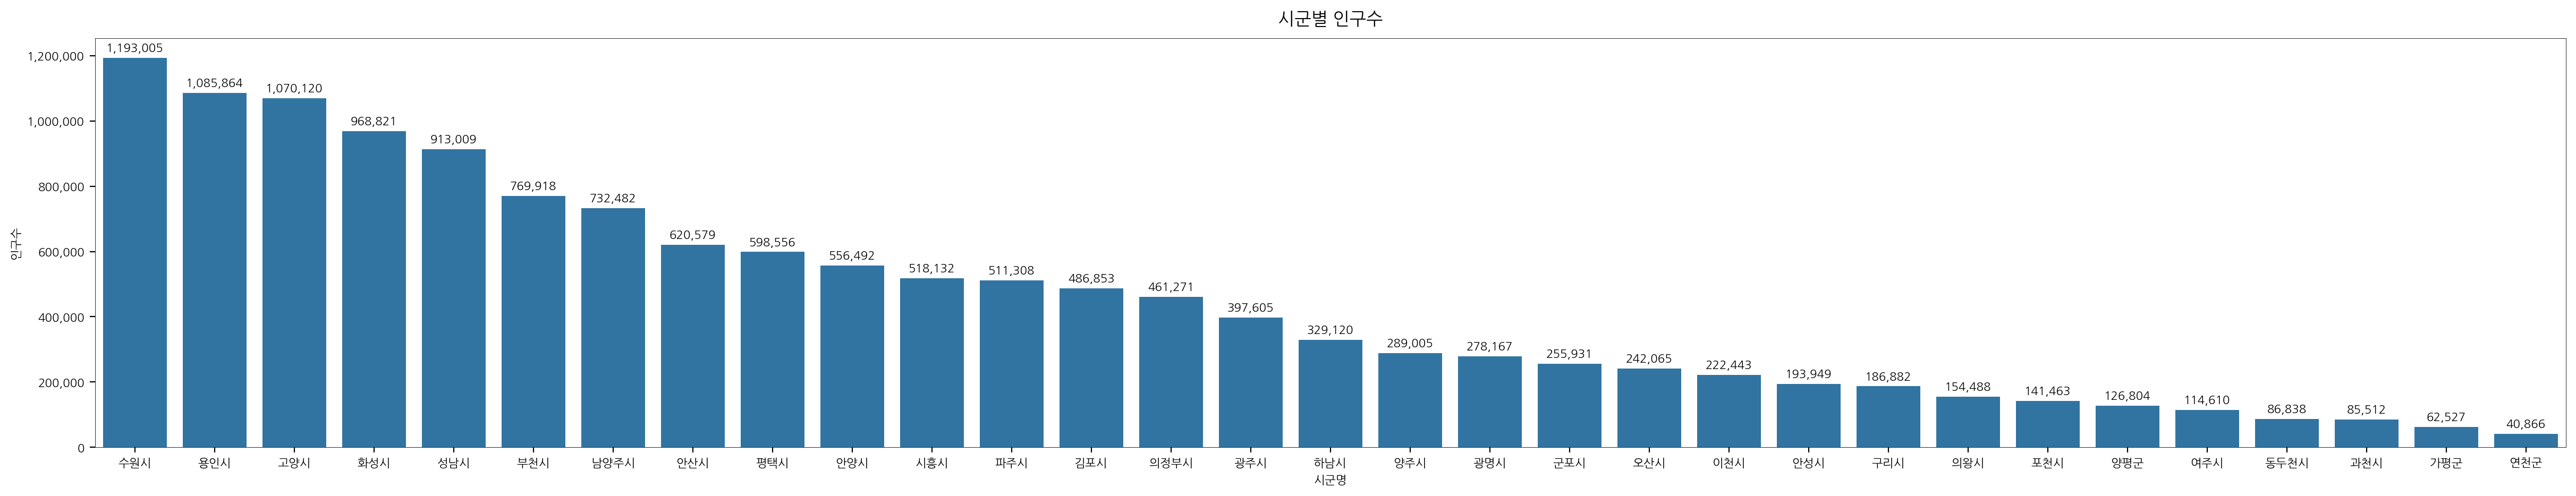

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# 바플롯 그리기
plt.figure(figsize=(30, 5))
plt.rc('font', size=8)
plt.rc('axes', linewidth=0.3)

ax = sns.barplot(x='시군명', y='2024년12월_총인구수', data=population4)

# 바에 레이블 추가
for container in ax.containers:
    # 10진수 형식으로 레이블 설정
    ax.bar_label(container,
                 labels=[f'{int(v):,}' for v in container.datavalues],  # 10진수 형식으로 변환
                 fontsize=8,
                 label_type='edge',
                 padding=3)

# y축 숫자 형식 설정
def millions_formatter(x, pos):
    return f'{int(x):,}'  # 10진수 형식으로 반환

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlabel('시군명')
plt.ylabel('인구수')
plt.title('시군별 인구수', size=12, pad=10)

plt.show()




*   수원, 용인, 고양, 화성. 성남 순으로 인구수가 많다.



## 유기동물 구조수 EDA

In [ ]:
import pandas as pd

# 데이터프레임 생성
data = {
    "연도": [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    "유실동물 구조수": [97197, 81147, 82082, 89732, 102593, 121077, 135791, 130401, 118273, 113440],
}

abandoned = pd.DataFrame(data)


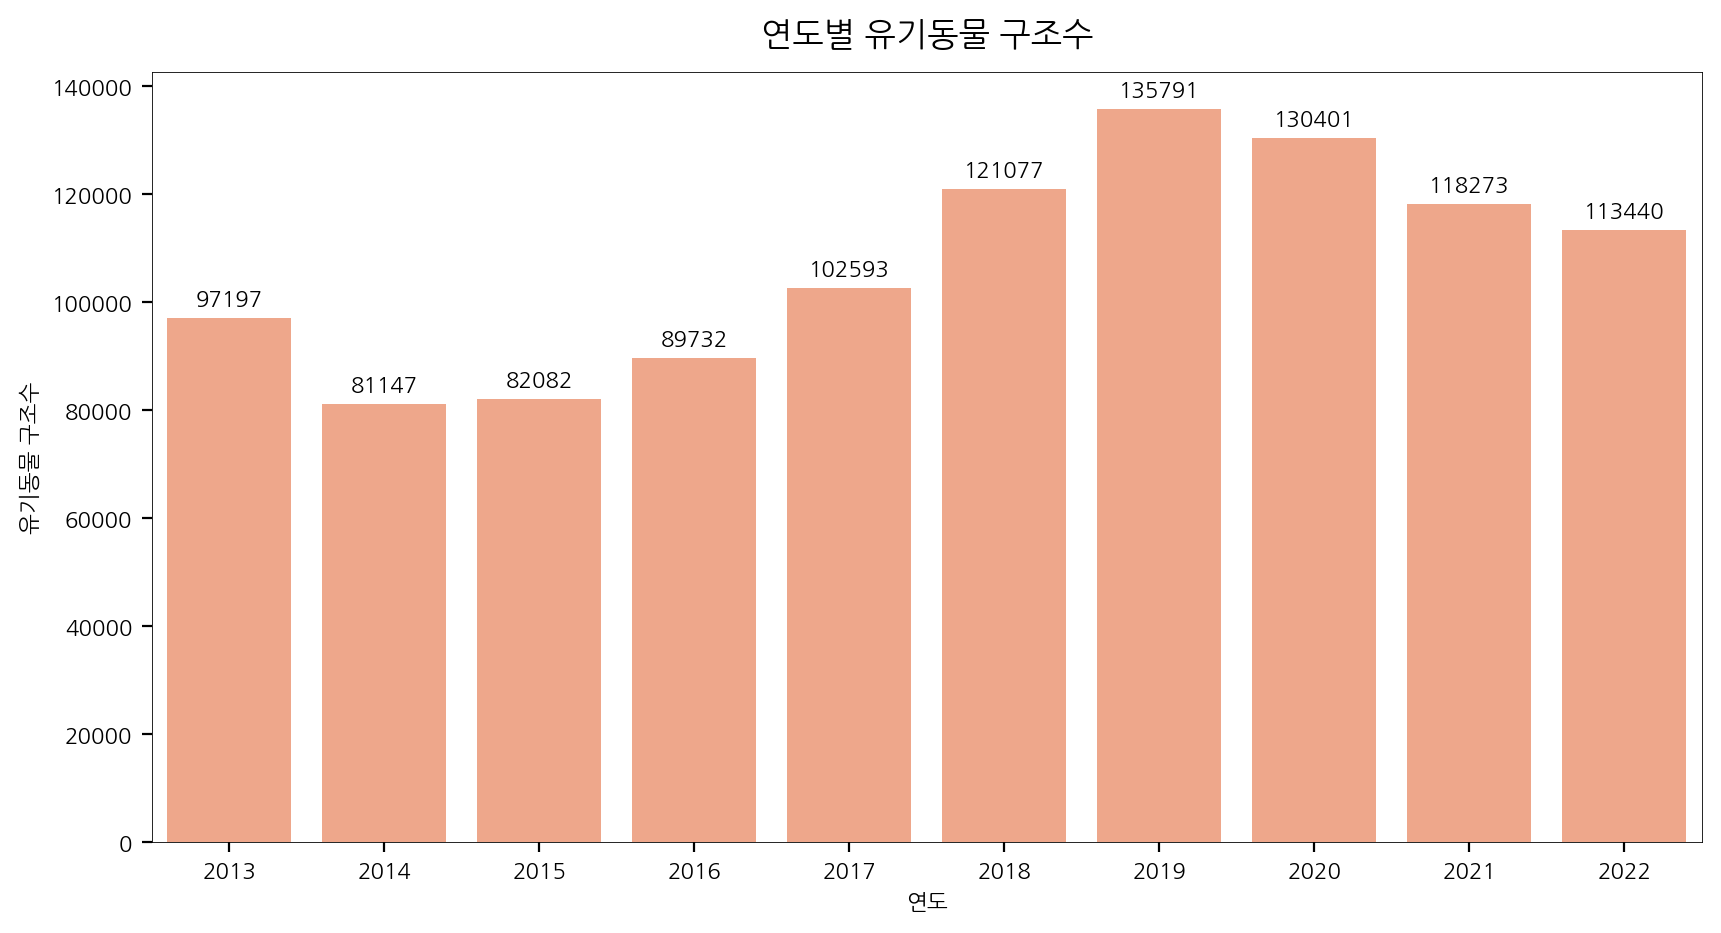

In [ ]:
# 바플롯 그리기
plt.figure(figsize=(10, 5))
plt.rc('font', size = 8)
plt.rc('axes', linewidth = 0.3)

ax = sns.barplot(x = '연도', y = '유실동물 구조수', data = abandoned, color='#FFA07A')
for container in ax.containers:
    ax.bar_label(container, fontsize=8, label_type='edge', padding = 3)

plt.xlabel('연도')
plt.ylabel('유기동물 구조수')
plt.title('연도별 유기동물 구조수',  size = 12, pad = 10)

plt.show()

## 시군별 데이터 EDA

In [ ]:
registration = pd.read_csv('/content/drive/MyDrive/시각화_데이터/등록현황.csv', encoding='utf-8-sig')

In [ ]:
registration2 = registration.groupby(by=['시군명'], as_index=False)[['등록동물수(마리)']].sum()

In [ ]:
temp1 = pd.merge(population4, hos_sort, how='left', on='시군명')
temp2 = pd.merge(temp1, dog_sort, how='left', on='시군명')
df = pd.merge(temp2, registration2, how='left', on='시군명')

In [ ]:
df = df.rename(columns={'2024년12월_총인구수': '인구수', '사업장명': '등록대행업체소의 수', '접수일자': '유기견의 수'})

In [ ]:
# df.to_csv('시군별_데이터.csv', encoding='cp949')

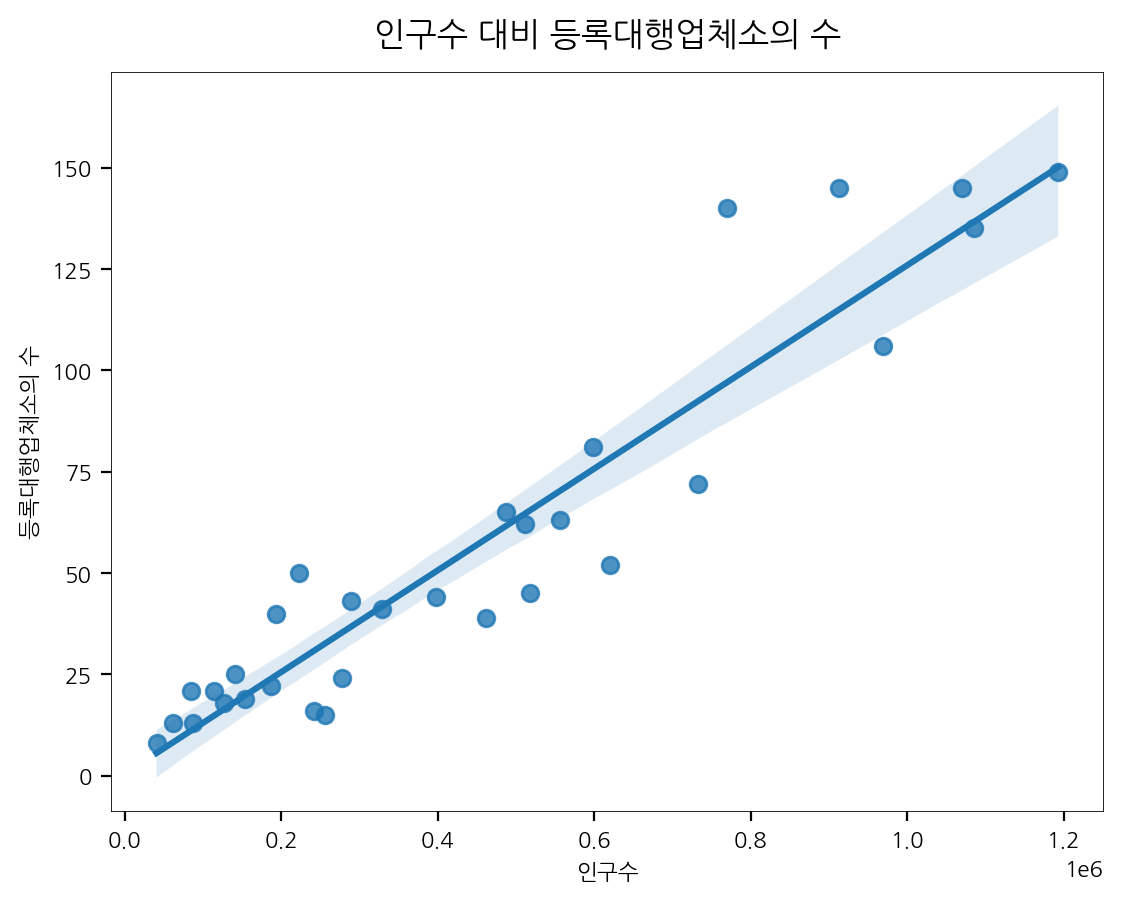

In [ ]:
sns.regplot(x='인구수', y='등록대행업체소의 수', data=df)
plt.title('인구수 대비 등록대행업체소의 수', size=12, pad=10)

plt.show()



*   사람이 많은 곳에 동물 등록대행 업체수가 많다.
*   등록대행업체 수는 인구수 혹은 유동 인구를 반영한다.



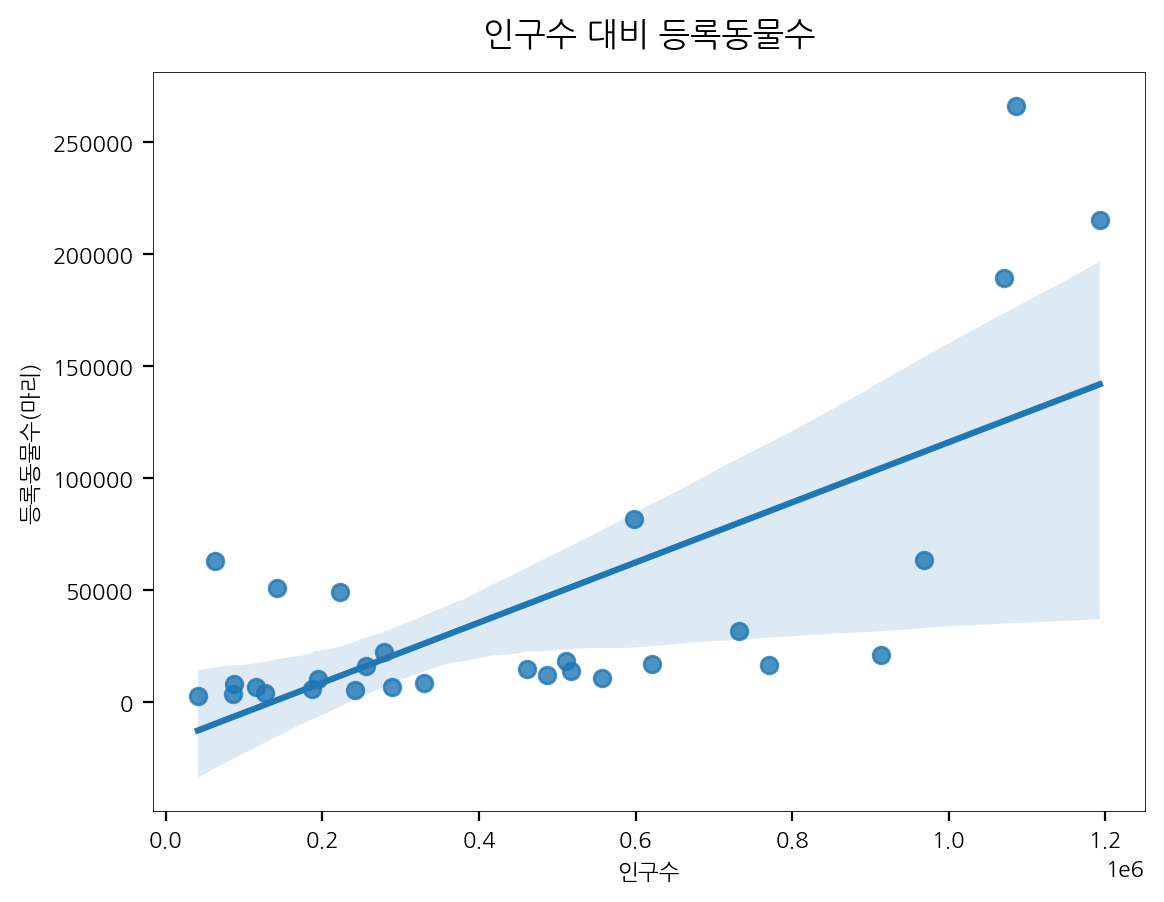

In [ ]:
sns.regplot(x='인구수', y='등록동물수(마리)', data=df)
plt.title('인구수 대비 등록동물수', size=12, pad=10)

plt.show()


*   인구수가 높으면 동물 등록률이 상승한다
*   양의 상관관계 (+)




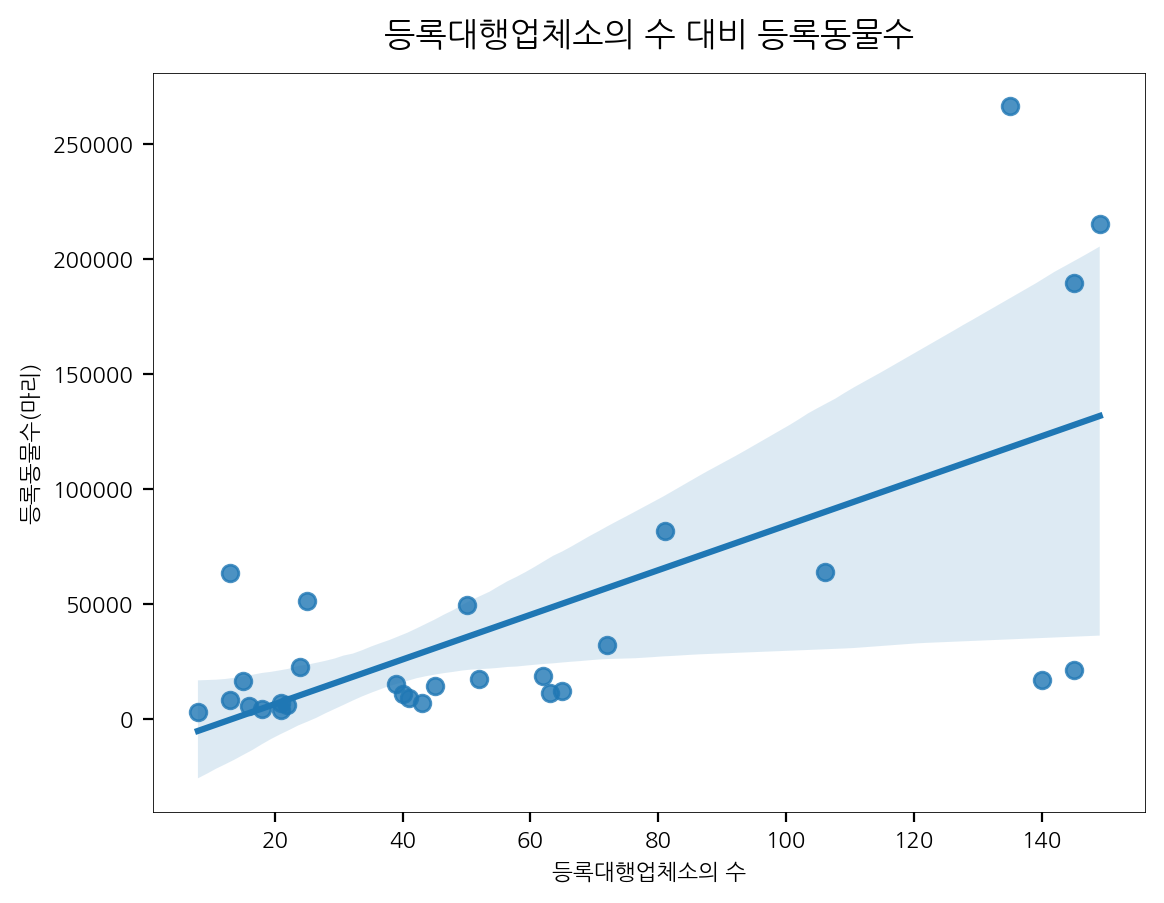

In [ ]:
sns.regplot(x='등록대행업체소의 수', y='등록동물수(마리)', data=df)
plt.title('등록대행업체소의 수 대비 등록동물수', size=12, pad=10)

plt.show()



*   등록대행업체수가 많을 수록 동물 등록률이 늘어난다.
*   동물 등록을 할 수 있는 곳이 많을 수록 동물 등록이 많아진다.



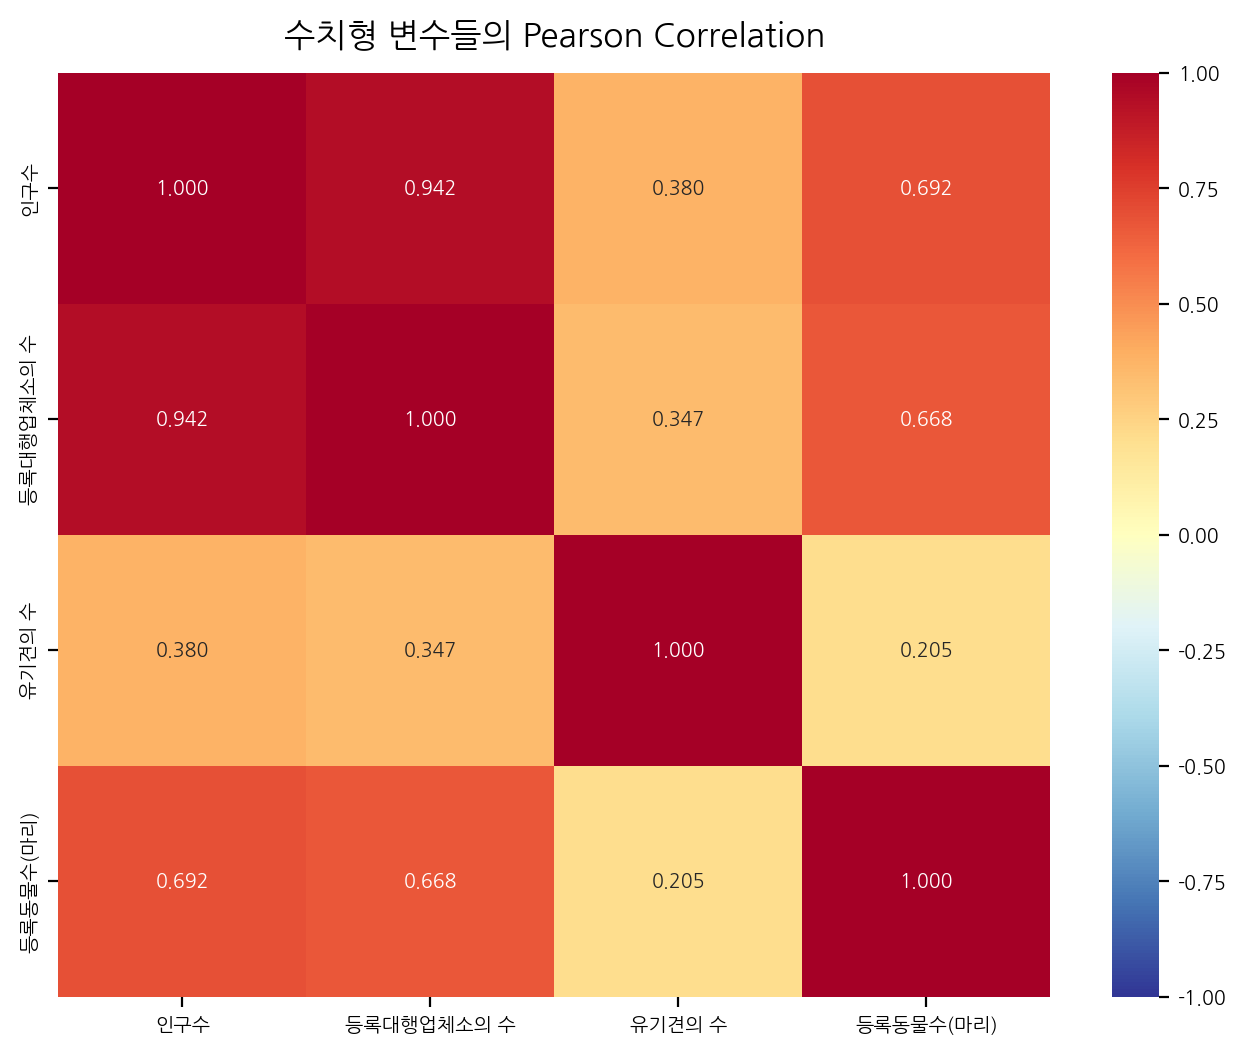

In [ ]:
plt.figure(figsize = (8, 6))

plt.rc('font', size = 7)
plt.rc('axes', linewidth = 0.3)

sns.heatmap(df.corr(numeric_only = True),
            annot = True,
            fmt = '.3f',
            cmap = 'RdYlBu_r',
            vmin = -1, vmax = 1)

plt.title('수치형 변수들의 Pearson Correlation', size = 12, pad = 10)


plt.show()



*   상관관계 계수를 보니 인구수, 등록대행업체수가 동물 등록과 강한 양의 상관관계가 나타난다.
*   입지 선정시 인구수, 등록대행업체수가 많은 도시에 추가적인 가중치를 줄 필요가 있다.



In [ ]:
df['1인당 유기견의 수'] = df['유기견의 수'] / df['인구수']

In [ ]:
df = df.sort_values(by='1인당 유기견의 수', ascending=False).reset_index(drop=True)

In [ ]:
# 바플롯 그리기
plt.figure(figsize=(30, 5))
plt.rc('font', size=8)
plt.rc('axes', linewidth=0.3)

ax = sns.barplot(x='시군명', y='1인당 유기견의 수', data=df)

# 바에 레이블 추가
for container in ax.containers:
    # 10진수 형식으로 레이블 설정
    ax.bar_label(container,
                 labels=[f'{int(v):,}' for v in container.datavalues],  # 10진수 형식으로 변환
                 fontsize=8,
                 label_type='edge',
                 padding=3)

# y축 숫자 형식 설정
def millions_formatter(x, pos):
    return f'{int(x):,}'  # 10진수 형식으로 반환

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlabel('시군명')
plt.ylabel('1인당 유기견의 수')
plt.title('시군별 1인당 유기견의 수', size=12, pad=10)

plt.show()

In [ ]:
temp = pd.read_excel('(별첨)경기도+행정구역+현황+240630(자치행정과).xlsx', sheet_name='Sheet1')

In [ ]:
df2 = pd.merge(df, temp, on='시군명', how='left')

In [ ]:
df2['면적당 유기견의 수'] = df2['유기견의 수'] / df2['면적']

In [ ]:
df2 = df2.sort_values(by='면적당 유기견의 수', ascending=False).reset_index(drop=True)

In [ ]:
# 바플롯 그리기
plt.figure(figsize=(30, 5))
plt.rc('font', size=8)
plt.rc('axes', linewidth=0.3)

ax = sns.barplot(x='시군명', y='면적당 유기견의 수', data=df2)

# 바에 레이블 추가
for container in ax.containers:
    # 10진수 형식으로 레이블 설정
    ax.bar_label(container,
                 labels=[f'{int(v):,}' for v in container.datavalues],  # 10진수 형식으로 변환
                 fontsize=8,
                 label_type='edge',
                 padding=3)

# y축 숫자 형식 설정
def millions_formatter(x, pos):
    return f'{int(x):,}'  # 10진수 형식으로 반환

ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

plt.xlabel('시군명')
plt.ylabel('면적당 유기견의 수')
plt.title('시군별 면적당 유기견의 수', size=12, pad=10)

plt.show()

<br>

# 최적입지 선정 모델링(MCLP)

## Date Load & Preprocessing

In [ ]:
import pandas as pd

# 파일 경로를 지정합니다.
file_path1 = '/content/drive/MyDrive/반려동물_데이터/경기도_동물병원현황.csv'  # 실제 파일 경로로 변경해야 합니다.
file_path2 = '/content/drive/MyDrive/반려동물_데이터/경기도_유기동물보호현황.csv'  # 실제 파일 경로로 변경해야 합니다.
file_path3 = '/content/drive/MyDrive/반려동물_데이터/도시공원정보현황(제공표준).csv'  # 실제 파일 경로로 변경해야 합니다.

try:
  # CSV 파일을 pandas DataFrame으로 불러옵니다.
  animal_hospitals_df = pd.read_csv(file_path1, encoding='cp949')
  abandoned_animals_df = pd.read_csv(file_path2, encoding='cp949')
  urban_parks_df = pd.read_csv(file_path3, encoding='cp949')

  # 데이터프레임 출력 (선택사항)
  print("DataFrame 1:\n", animal_hospitals_df.head())
  print("\nDataFrame 2:\n", abandoned_animals_df.head())
  print("\nDataFrame 3:\n", urban_parks_df.head())

except FileNotFoundError:
  print(f"파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except pd.errors.ParserError:
  print(f"CSV 파일 파싱 오류. 파일 형식을 확인해주세요.")
except Exception as e:
  print(f"오류 발생: {e}")

파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.


In [ ]:
animal_hospitals_df.columns

Index(['시군명', '사업장명', '인허가일자', '인허가취소일자', '영업상태구분코드', '영업상태명', '폐업일자',
       '소재지시설전화번호', '소재지면적정보', '도로명우편번호', '소재지도로명주소', '소재지지번주소', '소재지우편번호',
       'WGS84위도', 'WGS84경도', '업태구분명정보', 'X좌표값', 'Y좌표값', '축산업무구분명', '축산고유번호',
       '권리주체일련번호'],
      dtype='object')

In [ ]:
abandoned_animals_df.columns

Index(['시군명', '접수일자', '발견장소', '상태', '공고고유번호', '공고시작일자', '공고종료일자', '품종', '색상',
       '나이', '체중', '성별', '중성화여부', '특징', '보호소명', '보호소전화번호', '보호소도로명주소',
       '보호소지번주소', '보호소우편번호', '관할기관', '특이사항', '이미지경로', '썸네일이미지경로', 'WGS84위도',
       'WGS84경도'],
      dtype='object')

In [ ]:
urban_parks_df.columns

Index(['공원명', '공원구분', '소재지도로명주소', '소재지지번주소', '위도', '경도', '공원면적(㎡)',
       '공원보유시설(운동시설)', '공원보유시설(유희시설)', '공원보유시설(편익시설)', '공원보유시설(교양시설)',
       '공원보유시설(기타시설)', '지정고시일', '관리기관명', '전화번호', '데이터기준일자'],
      dtype='object')

In [ ]:
# 컬럼 이름 변경 및 null 값 제거 함수 (소재지지번주소 추가)
def process_dataframe(df, name_col, lat_col, lon_col, address_col=None, demand_col=None):
    selected_cols = [name_col, lat_col, lon_col]
    if address_col:
        selected_cols.append(address_col)

    df = df[selected_cols].copy()

    # 컬럼 이름 설정
    if address_col:
        df.columns = ['name', 'latitude', 'longitude', 'address']
    else:
        df.columns = ['name', 'latitude', 'longitude']

    # Null 값 제거
    df.dropna(subset=['latitude', 'longitude'], inplace=True)

    # 중복된 행 제거
    df.drop_duplicates(subset='name', keep='first', inplace=True)

    # demand 컬럼 추가
    if demand_col:
        demand = df.groupby('name').size().reset_index(name='demand')
        df = pd.merge(df, demand, on='name', how='left')

    return df

# 각 데이터프레임 처리 (소재지지번주소 추가)
animal_hospitals_df = process_dataframe(animal_hospitals_df, '사업장명', 'WGS84위도', 'WGS84경도', address_col='소재지지번주소')
abandoned_animals_df = process_dataframe(abandoned_animals_df, '보호소명', 'WGS84위도', 'WGS84경도', demand_col='유기동물수')
urban_parks_df = process_dataframe(urban_parks_df, '공원명', '위도', '경도')

# 결과 출력 (선택사항)
print("Animal Hospitals DataFrame:\n", animal_hospitals_df.head())
print("\nAbandoned Animals DataFrame:\n", abandoned_animals_df.head())
print("\nUrban Parks DataFrame:\n", urban_parks_df.head())

Animal Hospitals DataFrame:
                    name   latitude   longitude                        address
0                경기동물병원  37.735850  127.415936       경기도 가평군 청평면 청평리 438-23번지
1                가평동물병원  37.826264  127.513636        경기도 가평군 가평읍 대곡리 236-7번지
2           가평축산농협 동물병원  37.824930  127.515010        경기도 가평군 가평읍 대곡리 166-1번지
4  우랑동물병원(산업동물출장진료전문병원)  37.833123  127.508921            경기도 가평군 가평읍 읍내리 602
5                설악동물병원  37.678248  127.490621  경기도 가평군 설악면 신천리 435-3 설악동물병원 

Abandoned Animals DataFrame:
          name   latitude   longitude  demand
0  24시아이동물메디컬  37.525666  126.804553       1
1  남양주시동물보호센터  37.608784  127.191520       1
2    펫앤쉘터동물병원  37.367098  127.127688       1
3  양평군유기동물보호소  37.510957  127.513193       1
4   고양시동물보호센터  37.649779  126.870086       1

Urban Parks DataFrame:
        name   latitude   longitude
0   목동 근린공원  37.889301  127.549631
1  제12호 소공원  37.831447  127.505818
2   가평 체육공원  37.825526  127.504204
3  다목적 체육공원  37.803757  127.347155
4 

In [ ]:
animal_hospitals_df.head(2)

,name,latitude,longitude,address
0,경기동물병원,37.735850,127.415936,경기도 가평군 청평면 청평리 438-23번지
1,가평동물병원,37.826264,127.513636,경기도 가평군 가평읍 대곡리 236-7번지


In [ ]:
abandoned_animals_df.head(2)

,name,latitude,longitude,demand
0,24시아이동물메디컬,37.525666,126.804553,1
1,남양주시동물보호센터,37.608784,127.191520,1


In [ ]:
urban_parks_df.head(2)

,name,latitude,longitude
0,목동 근린공원,37.889301,127.549631
1,제12호 소공원,37.831447,127.505818


---

## **가중치 선정**
1.   위 EDA 결과를 반영하여 가중치 선정
  - 용인, 수원, 고양에 있는 동물병원에 가중치 2 나머지 1




2.  유기견 수는 평택, 파주, 포천 등에서 많이 발생하고 있으나 유기견 생포 및 관리는 유기견 보호소 담당임으로 유기견 보호소에 가중치 부여

  - 유기견 보호소 별 보호하고 있는 유기견 수를 가중치로 부여

  - 보호 하고 있는 유기견 수가 많을 수록 수용력이 큰 보호소임을 고려


---

In [ ]:
# 'weight' 컬럼 추가 및 address 삭제
def add_weight_column(df):
    df['weight'] = df['address'].apply(lambda x: 2 if any(city in str(x) for city in ['용인시', '수원시', '고양시']) else 1)
    df.drop('address', axis=1, inplace=True)
    return df

animal_hospitals_df = add_weight_column(animal_hospitals_df)


# 결과 확인 (선택사항)
print("Animal Hospitals DataFrame:\n", animal_hospitals_df.head())


Animal Hospitals DataFrame:
                    name   latitude   longitude  weight
0                경기동물병원  37.735850  127.415936       1
1                가평동물병원  37.826264  127.513636       1
2           가평축산농협 동물병원  37.824930  127.515010       1
4  우랑동물병원(산업동물출장진료전문병원)  37.833123  127.508921       1
5                설악동물병원  37.678248  127.490621       1


In [ ]:
pip install pulp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 99.8 MB/s eta 0:00:00


## 하버사인 공식 (Haversine Formula)

---

이런 경우 두 위치도 좌표 사이의 거리를 구할 때 사용하는 것이 하버사인 공식입니다. 공식은 다음과 같습니다.

$$
\Theta = \frac{d}{r}
$$

$\Theta$는 두 점을 잇는 호의 중심각입니다 (라디안 단위)

$$
\text{hav}(\Theta) = \text{hav}(\varphi_2 - \varphi_1) + \cos(\varphi_1) \cos(\varphi_2) \text{hav}(\lambda_2 - \lambda_1)
$$

- $\varphi_1, \varphi_2$: 1지점과 2지점의 위도 (라디안 단위)
- $\lambda_1, \lambda_2$: 1지점과 2지점의 경도 (라디안 단위)

$\text{hav}(\Theta)$는 하버사인 함수를 다음과 같이 표현됩니다.

$$
\text{hav}(\theta) = \sin^2\left(\frac{\theta}{2}\right) = \frac{1 - \cos(\theta)}{2}
$$

거리를 구하기 위해서 역함수인 아크하버사인을 곱해줍니다.

$$
d = r \cdot \text{archav}(h) = 2r \cdot \text{arcsin}(\sqrt{h})
$$

$$
d = 2r \cdot \text{arcsin}\left(\sqrt{\text{hav}(\varphi_2 - \varphi_1) + \cos(\varphi_1) \cos(\varphi_2) \cdot \text{hav}(\lambda_2 - \lambda_1)}\right)
$$

$$
= 2r \cdot \text{arcsin}\left(\sqrt{\sin^2\left(\frac{\varphi_2 - \varphi_1}{2}\right) + \cos(\varphi_1) \cos(\varphi_2) \cdot \sin^2\left(\frac{\lambda_2 - \lambda_1}{2}\right)}\right)
$$

즉, 마지막 공식을 이용하면 두 지점 사이의 거리를 구할 수 있습니다.

---



## 최대 커버리지 위치 문제 (Maximum Coverage Location Problem)


![예시 이미지](https://ars.els-cdn.com/content/image/1-s2.0-S1026309811002100-gr1.jpg)





입력 데이터

- **병원 (Hospitals)**: $H = \{h_1, h_2, \ldots, h_n\}$ (동물 병원 위치 집합)
- **요구 (Demands)**: $D = \{d_1, d_2, \ldots, d_m\}$ (유기 동물 요구 위치 집합)
- **공원 (Parks)**: $P = \{p_1, p_2, \ldots, p_k\}$ (도시 공원 위치 집합)
- **위치 및 거리**:
  - \( d_{ij} \): 공원 \( p_i \)와 병원 \( h_j \) 사이의 거리
  - \( w_j \): 병원 \( h_j \)의 가중치 (중요도)

목적 함수

MCLP의 목적은 총 거리 최소화를 통해 요구를 충족하는 것입니다. 이를 수학적으로 표현하면 다음과 같습니다:

$$
\text{Minimize} \quad Z = \sum_{i=1}^{k} \sum_{j=1}^{n} d_{ij} \cdot w_j \cdot y_{ij}
$$

여기서:
- \( d_{ij} \): 공원 \( p_i \)와 병원 \( h_j \) 사이의 거리
- \( w_j \): 병원 \( h_j \)의 가중치
- \( y_{ij} \): 공원 \( p_i \)가 병원 \( h_j \)의 요구를 충족하는 여부 (0 또는 1)

제약 조건

1. **요구 충족 제약**:
   각 병원의 요구는 최소한 해당 요구량만큼 충족되어야 합니다. 이를 수학적으로 표현하면:

   $$
   \sum_{i=1}^{k} y_{ij} \geq d_j, \quad \forall j \in H
   $$

   여기서 \( d_j \)는 병원 \( h_j \)의 요구량입니다.

2. **용량 제약**:
   각 공원은 정해진 용량 이상으로 요구를 수용할 수 없습니다. 따라서:

   $$
   \sum_{j=1}^{n} y_{ij} \leq C_i \cdot x_i, \quad \forall i \in P
   $$

   여기서 \( C_i \)는 공원 \( p_i \)의 용량, \( x_i \)는 공원 \( p_i \)의 선택 여부 (0 또는 1)입니다.

3. **최소 선택 공원 수 제약**:
   선택할 공원의 수를 정해진 숫자로 제한합니다. 예를 들어, 10개의 공원을 선택해야 한다면:

   $$
   \sum_{i=1}^{k} x_i = 10
   $$

변수 정의

- \( x_i \): 공원 \( p_i \)의 선택 여부 (0 또는 1)
- \( y_{ij} \): 공원 \( p_i \)가 병원 \( h_j \)의 요구를 충족하는 여부 (0 또는 1)

이 모델을 통해 주어진 공원에서 효율적으로 요구를 충족하고, 총 거리를 최소화할 수 있습니다.

---


## MCLP 파라미터 정보



이 문서는 MCLP(Multiple Covering Location Problem) 알고리즘에 사용되는 주요 파라미터를 정리한 것입니다.

1. 수요 지점 개수
- **동물 병원 개수**:
  - ```python
    num_demand_points = len(abandoned_animals_df)
    ```

 2. 선택할 시설 개수
- **최적 입지**: 10개
  - ```python
    K = 10
    ```

3. 각 시설의 커버리지 반경
- **용량**: 250
  - ```python
    capacity_per_park = 250  # 각 공원의 용량
    ```

4. 후보지 크기
- **공원의 개수**:
  - ```python
    num_candidate_sites = len(parks)
    ```

이 정보를 바탕으로 MCLP 문제를 해결하기 위한 최적의 입지를 선정할 수 있습니다.

---

## MCLP 모델링

Recommended Parks: ['금호어울림공원', '한강주제3', '중앙역', '6호 체육공원', '맑은내공원', '통일동산(2) 노을동산', '미관광장 27호', '미관광장 28호', '미관광장 29호', '미관광장 16호']


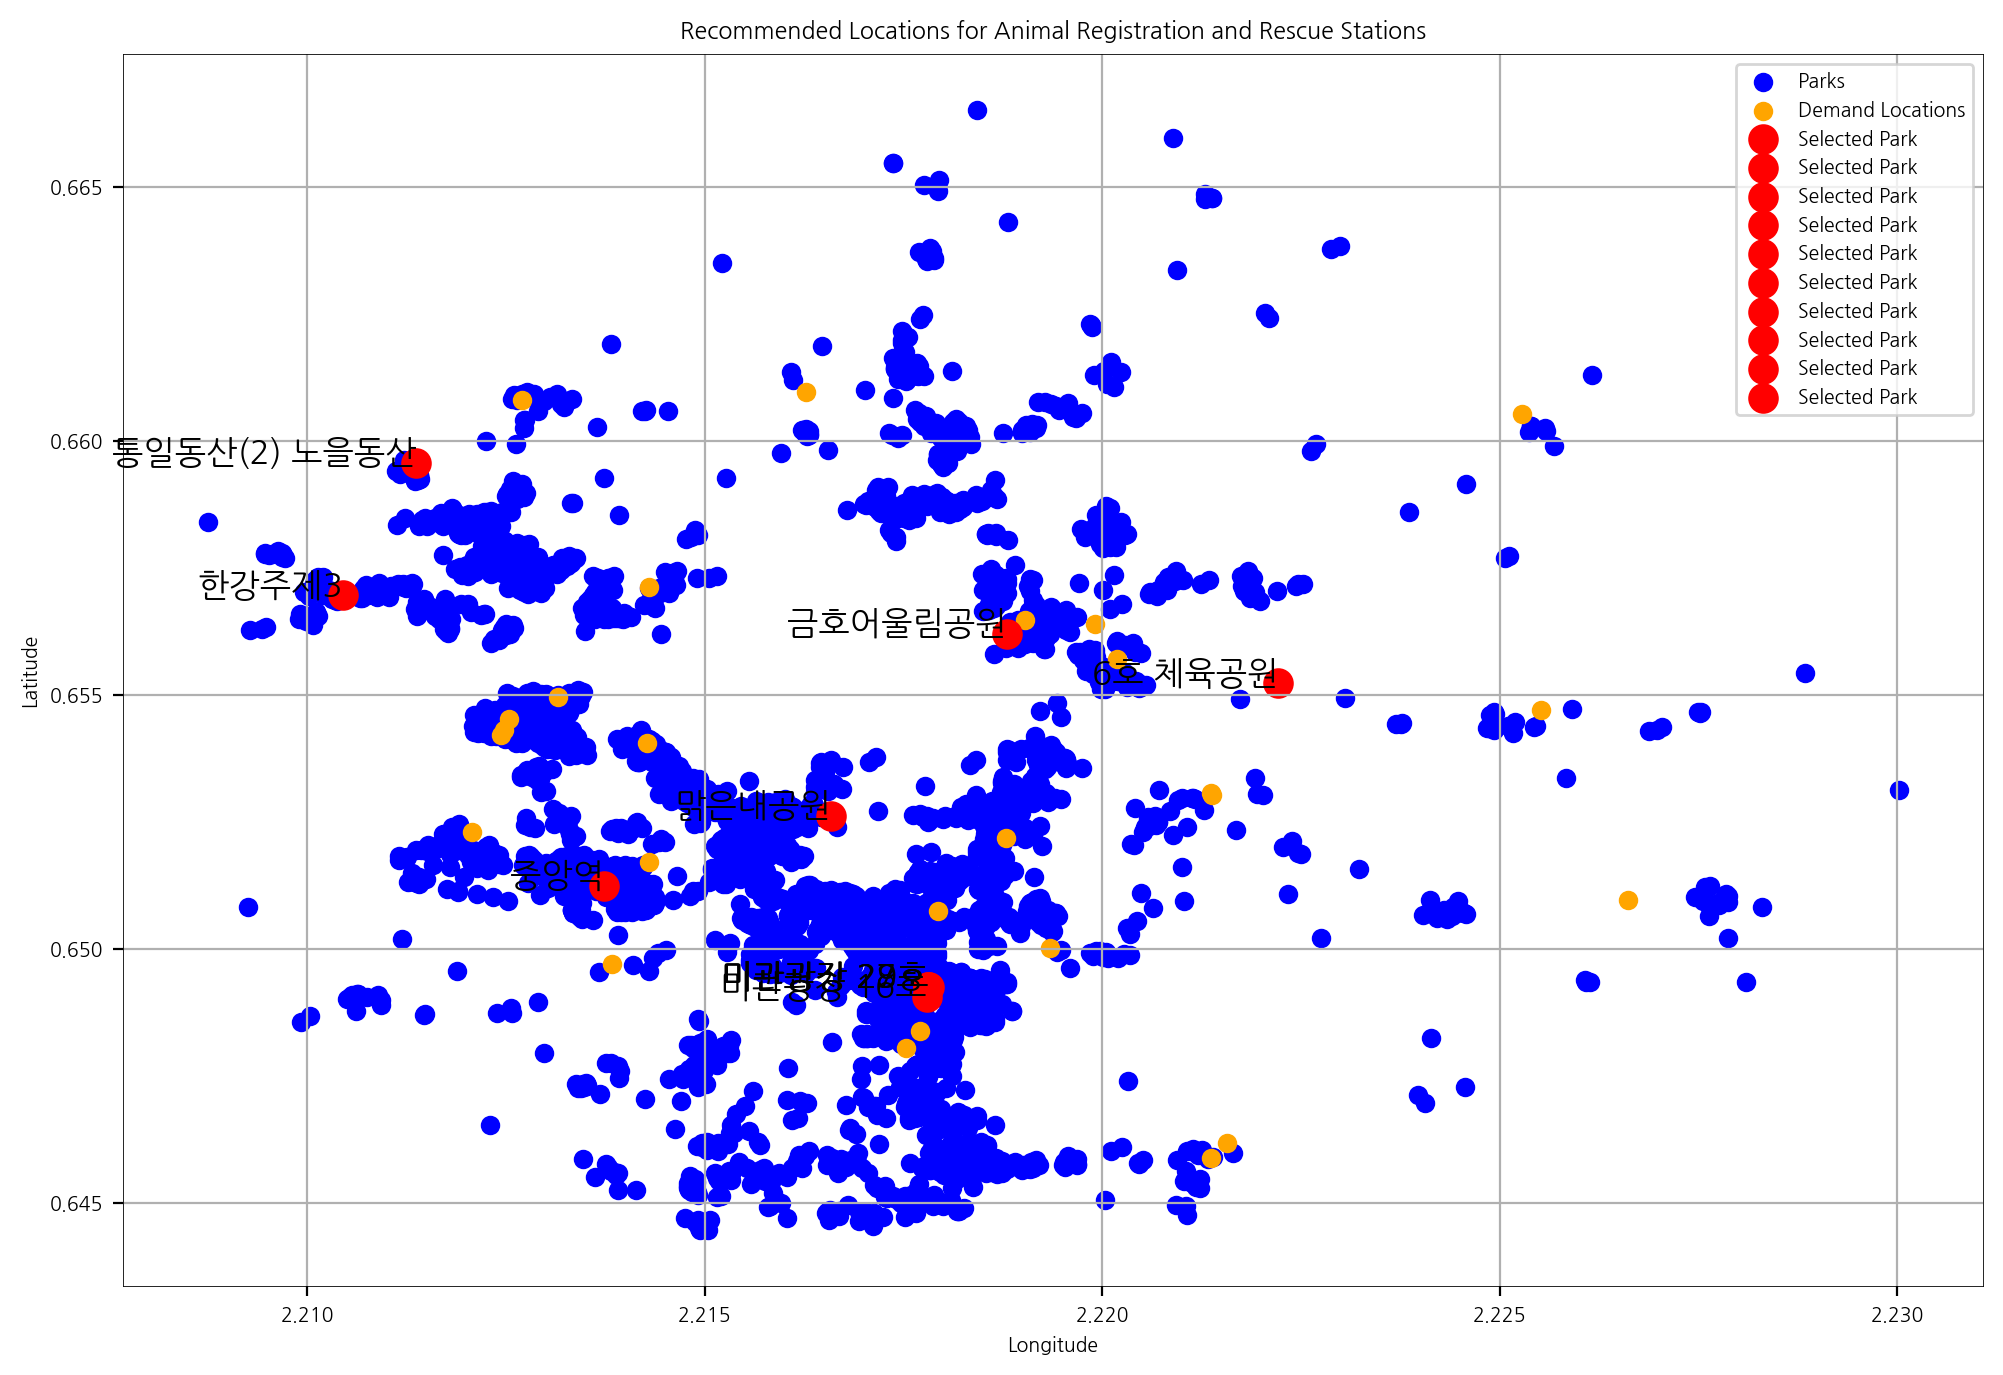

,name,latitude,longitude,MCLP,selected
270,문원어린이공원,0.653137,2.216722,27.155572,False
2872,청계공원,0.652713,2.217183,27.161702,False
279,사기막골1 어린이공원,0.653094,2.216553,27.170232,False
274,문원체육공원,0.653241,2.216632,27.199611,False
2888,초록공원,0.652636,2.216570,27.204909,False
...,...,...,...,...,...
3797,운천 제1공원,0.664851,2.221296,78.944310,False
2453,24호 소공원(로하스파크),0.665468,2.217367,79.224618,False
2454,23호 소공원(로하스파크),0.665468,2.217367,79.224618,False
3802,초과공원,0.665959,2.220887,84.867772,False


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import haversine_distances
from pulp import LpProblem, LpVariable, lpSum, LpBinary, LpMinimize

# MCLP 알고리즘 함수
def calculate_mclp(hospitals, demands, parks):
    # 위도, 경도를 라디안으로 변환
    hospitals[['latitude', 'longitude']] = np.radians(hospitals[['latitude', 'longitude']])
    demands[['latitude', 'longitude']] = np.radians(demands[['latitude', 'longitude']])
    parks[['latitude', 'longitude']] = np.radians(parks[['latitude', 'longitude']])

    # 거리 계산
    distances = {}
    for i, park_row in parks.iterrows():
        park_name = park_row['name']
        distances[park_name] = {}
        for j, hospital_row in hospitals.iterrows():
            hospital_name = hospital_row['name']
            dist = haversine_distances(
                [[park_row['latitude'], park_row['longitude']],
                 [hospital_row['latitude'], hospital_row['longitude']]])[0][1] * 6371
            distances[park_name][hospital_name] = dist

    # MCLP 모델 정의
    problem = LpProblem("MCLP", LpMinimize)

    # 변수 정의
    x = LpVariable.dicts("ParkSelected", parks['name'], cat=LpBinary)
    y = LpVariable.dicts("DemandAssigned", (parks['name'], demands['name']), lowBound=0)

    # 목적 함수: 총 거리 최소화 (가중치 반영)
    problem += lpSum(distances[park_name][hospital_row[1]] * hospital_row.weight * y[park_name][demand_row.name]
                 for park_name in parks['name']
                 for hospital_row in hospitals.itertuples()
                 for demand_row in demands.itertuples()), "TotalDistance"

    # 제약 조건: 수요를 충족해야 함
    for demand_row in demands.itertuples():
        problem += lpSum(y[park_name][demand_row.name] for park_name in parks['name']) >= demand_row.demand, f"Demand_{demand_row.name}"

    # 각 공원의 용량 제약
    for park_name in parks['name']:
        problem += lpSum(y[park_name][demand_row.name] for demand_row in demands.itertuples()) <= 250 * x[park_name], f"Capacity_{park_name}"

    # 최소 선택 공원 수 제약 (10개로 수정)
    problem += lpSum(x[park_name] for park_name in parks['name']) == 10, "SelectTenParks"

    # 문제 해결
    problem.solve()

    # 결과 수집
    selected_parks = [park_name for park_name in parks['name'] if x[park_name].varValue == 1]

    # MCLP 수치 계산: 각 공원의 평균 거리
    mclp_scores = {}
    for park_name, park_distances in distances.items():
        mclp_scores[park_name] = np.mean(list(park_distances.values()))

    # MCPL 점수를 데이터프레임에 추가
    parks['MCLP'] = parks['name'].map(mclp_scores)

    # MCLP 수치 오름차순 정렬
    parks = parks.sort_values(by='MCLP', ascending=True)

    return selected_parks, parks

# MCLP 계산
selected_parks, urban_parks_df_with_mclp = calculate_mclp(animal_hospitals_df, abandoned_animals_df, urban_parks_df)

# 결과 출력
print("Recommended Parks:", selected_parks)

# 결과 데이터프레임 생성
urban_parks_df_with_mclp['selected'] = urban_parks_df_with_mclp['name'].isin(selected_parks)

# 시각화
plt.figure(figsize=(12, 8))
plt.scatter(urban_parks_df_with_mclp['longitude'], urban_parks_df_with_mclp['latitude'], color='blue', label='Parks')
plt.scatter(abandoned_animals_df['longitude'], abandoned_animals_df['latitude'], color='orange', label='Demand Locations')

# 추천 공원 강조
for i, row in urban_parks_df_with_mclp.iterrows():
    if row['selected']:
        plt.scatter(row['longitude'], row['latitude'], color='red', s=100, label='Selected Park')
        plt.text(row['longitude'], row['latitude'], row['name'], fontsize=12, ha='right')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Recommended Locations for Animal Registration and Rescue Stations')
plt.legend()
plt.grid()
plt.show()

# 결과 데이터프레임
urban_parks_df_with_mclp


In [ ]:
urban_parks_df_with_mclp

,name,latitude,longitude,MCLP,selected
270,문원어린이공원,0.653137,2.216722,27.155572,False
2872,청계공원,0.652713,2.217183,27.161702,False
279,사기막골1 어린이공원,0.653094,2.216553,27.170232,False
274,문원체육공원,0.653241,2.216632,27.199611,False
2888,초록공원,0.652636,2.216570,27.204909,False
...,...,...,...,...,...
3797,운천 제1공원,0.664851,2.221296,78.944310,False
2453,24호 소공원(로하스파크),0.665468,2.217367,79.224618,False
2454,23호 소공원(로하스파크),0.665468,2.217367,79.224618,False
3802,초과공원,0.665959,2.220887,84.867772,False


In [ ]:
# Google Drive의 특정 경로에 저장
urban_parks_df_with_mclp.to_csv('urban_parks_with_mclp.csv', index=False)

In [ ]:
# prompt: urban_parks_df_with_mclp 데이터 프레임에 내 구글 드라이브에 있는 세 개 csv 불러와서 전처리하고 name에 맞는 위도, 경도를 merge 하는 코드 알려줘. 세 개 csv 파일 불러와서 전처리까지 하는 코드 알려줘. 이 파일에 첫부분 참고하면 돼.

import pandas as pd

# 파일 경로를 지정합니다. Google Drive 경로를 사용하세요.
file_path3 = '/content/drive/MyDrive/반려동물_데이터/도시공원정보현황(제공표준).csv'

try:
    # CSV 파일을 pandas DataFrame으로 불러옵니다. encoding='cp949'는 필요에 따라 변경하세요.
    urban_parks_df = pd.read_csv(file_path3, encoding='cp949')

    # 각 데이터프레임 처리
    urban_parks_df = process_dataframe(urban_parks_df, '공원명', '위도', '경도')

    # urban_parks_df에 위도, 경도 병합 (이 부분은 기존 코드에 없었으므로 추가했습니다.)
    # 'name' 컬럼을 기준으로 병합하는 방식을 사용합니다.
    # 필요한 경우, 병합 기준 컬럼과 병합 방법을 수정하세요.
    # 예시:
    merged_df = pd.merge(urban_parks_df_with_mclp, urban_parks_df, on='name', how='left')

    print("Preprocessing complete.")
    print("merged_df:\n", merged_df.head())

except FileNotFoundError:
    print(f"파일을 찾을 수 없습니다. 파일 경로를 확인해주세요.")
except pd.errors.ParserError:
    print(f"CSV 파일 파싱 오류. 파일 형식을 확인해주세요.")
except Exception as e:
    print(f"오류 발생: {e}")

Preprocessing complete.
merged_df:
           name  latitude_x  longitude_x       MCLP  selected  latitude_y  \
0      문원어린이공원    0.653137     2.216722  27.155572     False   37.421984   
1         청계공원    0.652713     2.217183  27.161702     False   37.397720   
2  사기막골1 어린이공원    0.653094     2.216553  27.170232     False   37.419544   
3       문원체육공원    0.653241     2.216632  27.199611     False   37.427927   
4         초록공원    0.652636     2.216570  27.204909     False   37.393284   

   longitude_y  
0   127.008803  
1   127.035213  
2   126.999149  
3   127.003658  
4   127.000109  


In [ ]:
merged_df


,name,latitude_x,longitude_x,MCLP,selected,latitude_y,longitude_y
0,문원어린이공원,0.653137,2.216722,27.155572,False,37.421984,127.008803
1,청계공원,0.652713,2.217183,27.161702,False,37.397720,127.035213
2,사기막골1 어린이공원,0.653094,2.216553,27.170232,False,37.419544,126.999149
3,문원체육공원,0.653241,2.216632,27.199611,False,37.427927,127.003658
4,초록공원,0.652636,2.216570,27.204909,False,37.393284,127.000109
...,...,...,...,...,...,...,...
3742,운천 제1공원,0.664851,2.221296,78.944310,False,38.093156,127.270890
3743,24호 소공원(로하스파크),0.665468,2.217367,79.224618,False,38.128508,127.045762
3744,23호 소공원(로하스파크),0.665468,2.217367,79.224618,False,38.128508,127.045762
3745,초과공원,0.665959,2.220887,84.867772,False,38.156659,127.247438


In [ ]:
merged_df.to_csv('merged_df_weight.csv', index=False, encoding='utf-8-sig')

## MCLP로 선택된 10개의 공원 시각화

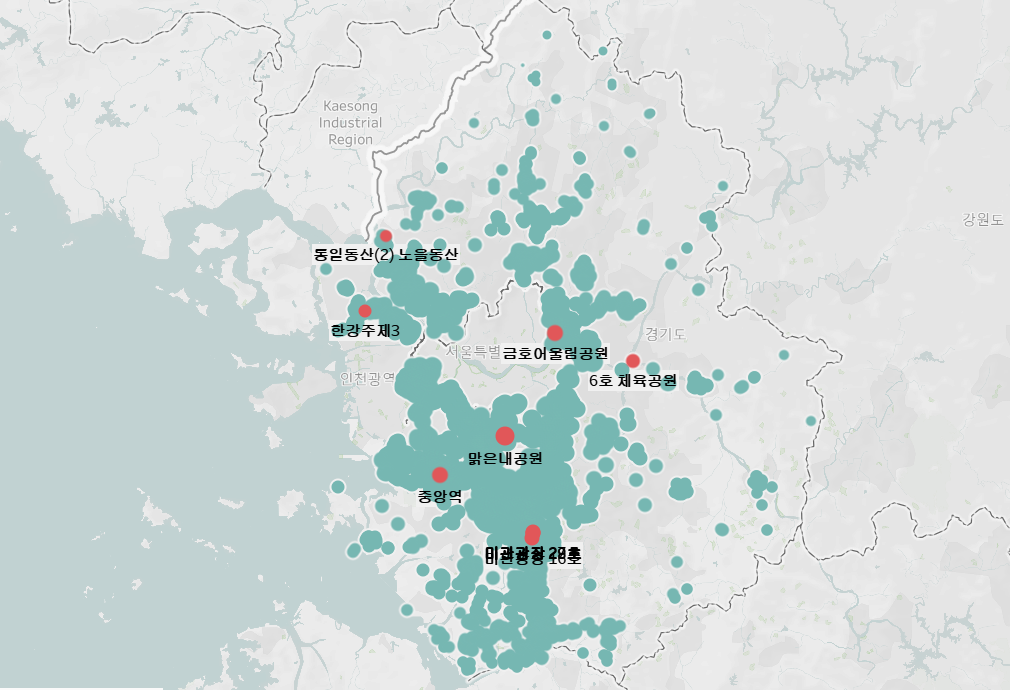

Recommended Parks: ['금호어울림공원', '한강주제3', '중앙역', '6호 체육공원', '맑은내공원', '통일동산(2) 노을동산', '미관광장 27호', '미관광장 28호', '미관광장 29호', '미관광장 16호']

## 최적 입지 선정 모델 인사이트

---


### 1. 모델 개요
최적 입지 선정 모델은 **Multiple Covering Location Problem (MCLP)** 알고리즘을 기반으로 하여, 특정 수요를 충족하기 위한 최적의 시설 위치를 선정하는 데 사용됩니다. 이 모델은 다양한 요소를 고려하여 수요지점에 대한 접근성을 극대화하는 것을 목표로 합니다.

### 2. 선정된 입지
모델을 통해 선정된 10개의 최적 입지는 다음과 같습니다:

| 순위 | 입지 이름                  | MCLP 점수 |        위도         |        경도         |
|------|---------------------------|------------|---------------------|---------------------|
| 1    | 맑은내공원                | 27.2075    | 37.39206921         | 127.0015066         |
| 2    | 중앙역                    | 33.2409    | 37.3133235          | 126.8379655         |
| 3    | 금호어울림공원          | 33.7157    | 37.59747604         | 127.1279615         |
| 4    | 미관광장 27호            | 35.4180    | 37.19936128         | 127.0710596         |
| 5    | 미관광장 29호            | 35.4479    | 37.19903793         | 127.071726          |
| 6    | 미관광장 28호            | 35.4516    | 37.19892475         | 127.0712124         |
| 7    | 미관광장 16호            | 36.2681    | 37.18793482         | 127.0703297         |
| 8    | 6호 체육공원             | 39.7762    | 37.54156652         | 127.3234231         |
| 9    | 한강주제3                | 45.1203    | 37.64088638         | 126.649432          |
| 10   | 통일동산(2) 노을동산     | 52.0681    | 37.79017288         | 126.7023175         |

### 3. 선정된 입지의 특성
선정된 입지들은 다음과 같은 특징을 지니고 있습니다:

#### 3.1. 접근성
- **주요 도로와의 근접성**: 선정된 입지들은 주요 도로와 가까워 이동이 용이합니다.
- **대중교통**: 대중교통 노선과의 연계가 잘 되어 있어 접근성이 높습니다.

#### 3.2. 인구 밀집 지역
- **수요가 높은 지역**: 인구 밀집 지역에 위치한 동물병원, 공원들을 기준으로 평균 거리를 최소화하는 장소를 선정하였습니다.
아이펫의 수요를 효과적으로 충족할 수 있습니다.

#### 3.3. 환경적 요인
- **녹지 공간의 확보**: 입지 주변에 녹지 공간이 있어 환경적으로 쾌적한 조건을 제공합니다. 주변에 산, 바다 등 자연환경과 가까운 위치에 존재하였습니다.

### 4. 결론
최적 입지 선정 모델은 다양한 데이터와 조건을 반영하여 효율적인 입지를 선정하였습니다.
선정된 10개 입지는 각기 다른 특성을 지니며, 수요를 충족시키는 데 최적의 조건을 갖추고 있습니다.
향후 추가적인 데이터 분석을 통해 더 많은 인사이트를 도출할 수 있을 것입니다.